<div style="text-align: center;">
  <h1>TA145 - Redes Neuronales y Aprendizaje Profundo</h1>
  <h2>Trabajo Práctico 2: Perceptrón, MLPs, CNNs y Autoencoders</h2>
</div>

---
---

<div style="text-align: left;">
  <h2><b>Introducción</b></h3>
</div>

---
---

<div style="text-align: left;">
  <h2><b>Desarrollo</b></h3>
</div>

<div style="text-align: left;">
  <h3><b>Librerías utilizadas</b></h3>
</div>

&ensp; Para llevar adelante el trabajo se utilizan librerías orientadas al manejo de datos, visualización, generación de combinaciones lógicas y construcción de modelos de aprendizaje automático. Estas herramientas permiten organizar los conjuntos de entrada, mostrar resultados de forma clara y entrenar redes neuronales de manera sencilla, integrando tanto utilidades básicas de *Python* como funciones específicas de *PyTorch* para el modelado y el procesamiento de datos.

In [ ]:
# --- Basic Imports ---
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import HTML, display
from typing import Tuple

# --- Logic Gate Imports ---
import itertools

# --- Deep Learning Imports (Pytorch) ---
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

---

<div style="text-align: left;">
  <h3><b>Base teórica - Perceptrón simple</b></h3>
</div>

<div style="text-align: left;">
  <h4><b>Fundamentos del perceptrón simple</b></h4>
</div>

&ensp; El perceptrón simple, introducido por Frank Rosenblatt en 1957, es el modelo más elemental dentro de las redes neuronales artificiales. Consta de una única neurona que recibe un vector de entrada $\mathbf{x} \in \mathbb{R}^n$, lo pondera mediante pesos $\mathbf{w}$ y aplica una función de activación binaria para determinar la clase asignada. Su objetivo es resolver problemas de clasificación linealmente separables.

&ensp; Cada entrada $x_i$ se multiplica por un peso $w_i$, y el modelo incorpora además un sesgo $b$ que desplaza la frontera de decisión. La salida del perceptrón es un valor discreto entre $\{-1, ~ +1\}$ (o entre $\{0, ~ +1\}$, dependiendo la bibliografía), permitiendo distinguir entre dos categorías opuestas.

&ensp; La Figura 1 muestra un esquema general de esta arquitectura, donde las entradas se combinan linealmente antes de ser procesadas por la función de activación.

<center>
<figure> <img src="https://raw.githubusercontent.com/felipeperassi/Neural-Networks/9cd0f5b980e35228f9f4d0e74c3c413c86b1197e/Perceptron/ReportImages/Perceptron.png" alt="Estructura de un perceptrón" width="700"> <figcaption><i>Figura 1.</i> Estructura de un perceptrón simple.</figcaption> </figure>
</center>

&ensp; A partir de esta estructura, el perceptrón calcula una combinación lineal de las entradas y, según el signo del resultado, asigna la clase correspondiente. Esto puede expresarse mediante la función de activación $h$, cuya salida es:

$$
h = \mathbf{w}^\top \mathbf{x} + b \Longrightarrow
\hat{y} = \text{sgn}(h) =
\begin{cases}
+1, & h \ge 0, \\
-1, & h < 0.
\end{cases}
$$

&ensp; En este contexto, la superficie de decisión está dada por el hiperplano definido por:

$$
\mathbf{w}^\top \mathbf{x} + b = 0.
$$

&ensp;

<div style="text-align: left;">
  <h4><b>Regla de aprendizaje</b></h4>
</div>

&ensp; El entrenamiento del perceptrón se realiza de manera supervisada. Para un par $(\mathbf{x}, y)$ con $y \in {-1, +1}$, el modelo ajusta sus parámetros únicamente cuando la predicción es incorrecta. La regla de actualización es:

$$
\mathbf{w} \leftarrow \mathbf{w} + \eta \, y \, \mathbf{x},
\qquad
b \leftarrow b + \eta \, y,
$$

donde $\eta > 0$ es la tasa de aprendizaje.  

&ensp; De manera intuitiva, el término $(y - \hat{y})$ regula si se debe realizar o no una corrección:

$$\begin{cases}
  y - \hat{y} = 0 \Rightarrow \text{predicción correcta, no se realizan cambios.} \\
  y - \hat{y} \neq 0 \Rightarrow \text{predicción incorrecta, se realizan cambios.}
\end{cases}$$

&ensp;

<div style="text-align: left;">
  <h4><b>Interpretación geométrica</b></h4>
</div>

&ensp; Desde un punto de vista geométrico, el entrenamiento del perceptrón consiste en encontrar un vector normal al hiperplano que separa las dos clases. Cada corrección de parámetros rota o desplaza dicho hiperplano. La región donde $\mathbf{w}^\top \mathbf{x} + b \ge 0$ se asigna a la clase $\hat{y} = +1$, mientras que el lado opuesto corresponde a $\hat{y} = -1$.

&ensp;

---

<div style="text-align: left;">
  <h4><b>Ejercicio 1</b></h4>
</div>

**Implemente un perceptrón simple que aprenda la función lógica AND y la función lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos los vectores de entrada de la red.**

&ensp;

&ensp; En este ejercicio, se implementa un perceptrón simple entrenándolo con conjuntos de datos que representan las tablas de verdad de las funciones lógicas **AND** y **OR**, codificando las entradas y salidas con valores en ${-1, +1}$, como se puede visualizar a continuación.

- Función **AND** de 2 entradas.

<table align="center"> <tr> <th style="text-align:center;">X₁</th> <th style="text-align:center;">X₂</th> <th style="text-align:center;">Y</th> </tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> </table>

- Función **AND** de 4 entradas.

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>

</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">

<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>

</td>
</tr> </table>


- Función **OR** de 2 entradas.

<table align="center"> <tr> <th style="text-align:center;">X₁</th> <th style="text-align:center;">X₂</th> <th style="text-align:center;">Y</th> </tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> </table>

- Función **OR** de 4 entradas.

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
</table>
</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>
</td>
</tr> 
</table>

&ensp; En base a esto, se comienza realizando la función llamada $\texttt{logic\_vectors}$, que genera automáticamente las combinaciones de entrada y las salidas correspondientes para una compuerta lógica dada. Primero construye todas las combinaciones posibles de valores en $\{1, -1\}$ según la cantidad de entradas especificada. Luego calcula la salida según el tipo de compuerta utilizando reglas lógicas definidas en el código. Finalmente, muestra la tabla de verdad resultante en formato HTML y devuelve las matrices de entradas y salidas listas para su uso en el entrenamiento del perceptrón.

In [ ]:
def logic_vectors(gate: str, n_inputs: int) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generates input-output pairs for a specified logic gate with n_inputs.
    """
    X = np.array(list(itertools.product([1, -1], repeat=n_inputs)))

    Y = []
    for x in X:
        if gate.upper() == "AND":
            y = 1 if all(xi == 1 for xi in x) else -1
        elif gate.upper() == "OR":
            y = 1 if any(xi == 1 for xi in x) else -1
        elif gate.upper() == "XOR":
            y = 1 if sum(1 for xi in x if xi == 1) % 2 == 1 else -1
        elif gate.upper() == "NAND":
            y = -1 if all(xi == 1 for xi in x) else 1
        elif gate.upper() == "NOR":
            y = -1 if any(xi == 1 for xi in x) else 1
        else:
            raise ValueError(f"Compuerta no reconocida: {gate}")
        Y.append(y)

    # Display the input-output pairs in an HTML table
    df_x = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(n_inputs)])
    df_y = pd.DataFrame(Y, columns=['Y'])
    html_table = pd.concat([df_x, df_y], axis=1).to_html(index=False)
    display(HTML(html_table))

    return X, np.array(Y)

&ensp; Así, se muestran las tablas correspondientes a las funciones de interés y se contrasta que lo que está devolviendo el código sea correcto.

In [96]:
display(HTML("<h3><b>Tablas de verdad generadas para las compuertas lógicas</b></h3>"))
display(HTML("<b>Compuerta AND</b>"))
X2, YAnd2 = logic_vectors("AND", 2)
X4, YAnd4 = logic_vectors("AND", 4)

display(HTML("<b>Compuerta OR</b>"))
X2, YOr2 = logic_vectors("OR", 2)
X4, YOr4 = logic_vectors("OR", 4)

X1,X2,Y
1,1,1
1,-1,-1
-1,1,-1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,1
1,1,1,-1,-1
1,1,-1,1,-1
1,1,-1,-1,-1
1,-1,1,1,-1
1,-1,1,-1,-1
1,-1,-1,1,-1
1,-1,-1,-1,-1
-1,1,1,1,-1
-1,1,1,-1,-1


X1,X2,Y
1,1,1
1,-1,1
-1,1,1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,1
1,1,1,-1,1
1,1,-1,1,1
1,1,-1,-1,1
1,-1,1,1,1
1,-1,1,-1,1
1,-1,-1,1,1
1,-1,-1,-1,1
-1,1,1,1,1
-1,1,1,-1,1


&ensp; Una vez obtenidas las tablas de verdad correspondientes a cada compuerta lógica, se procede a implementar el perceptrón siguiendo exactamente los conceptos desarrollados en el apartado teórico. En particular, el modelo utiliza la combinación lineal $h = \mathbf{w}^\top \mathbf{x} + b$, la función de activación signo para producir salidas en $\{-1, +1\}$ y la regla de actualización del perceptrón para ajustar los parámetros cuando un patrón es mal clasificado. A continuación se describen los métodos principales de la clase implementada.

- $\texttt{\_\_init\_\_}$: 
    inicializa el perceptrón dejando el vector de pesos $\mathbf{w}$ sin definir y creando la lista donde se registrará la evolución del error. Esto refleja el estado previo al entrenamiento, donde aún no existe un hiperplano  
    $$
    \mathbf{w}^\top \mathbf{x} + b = 0
    $$  
    que separe las dos clases.

- $\texttt{train}$:
    implementa la regla de aprendizaje del perceptrón en su forma incremental (en línea). Primero se extiende cada entrada con el término de sesgo, de modo que la combinación lineal pueda escribirse como
    $$
    h = \tilde{\mathbf{x}}^\top \mathbf{w},
    $$
    e inicializa los pesos con valores aleatorios pequeños. Para cada época, recorre los pares $(\tilde{\mathbf{x}}, t)$ y, si el patrón está mal clasificado (condición $t\,h \le 0$), actualiza los pesos según la regla
    $$
    \mathbf{w} \leftarrow \mathbf{w} + \eta \, t \, \tilde{\mathbf{x}},
    $$
    presentada en la base teórica. Al final de cada época se calculan las salidas del modelo,
    $$
    \hat{y} = \text{sgn}(\tilde{X}\mathbf{w}),
    $$
    y el error cuadrático medio correspondiente, que se almacena para analizar la convergencia. El proceso se detiene cuando en una época no se cometen errores de clasificación o se alcanza el número máximo de iteraciones.

- $\texttt{predict}$:
    evalúa nuevas entradas aplicando la combinación lineal  
    $$
    h = \tilde{\mathbf{x}}^\top \mathbf{w},
    $$  
    y la función signo,  
    $$
    \hat{y} = \text{sgn}(h),
    $$  
    determinando la clase según el lado del hiperplano  
    $$
    \mathbf{w}^\top \mathbf{x} + b = 0
    $$  
    en el que se encuentre cada patrón.

- $\texttt{\_\_MS\_error}$:
    calcula el error cuadrático medio:  
    $$
    E = \frac{1}{N}\sum_i (y_i - \hat{y}_i)^2.
    $$  
    Un error nulo implica que todas las predicciones coinciden con las etiquetas reales.

### • `capacity`

Estima de manera empírica la capacidad del perceptrón. Genera múltiples problemas aleatorios y verifica en cuáles el modelo logra encontrar un hiperplano separador. Se considera separable cuando el error final es cero, y la capacidad estimada se calcula como  
$$
\text{Capacidad} = \frac{\text{problemas separables}}{\text{total de problemas}}.
$$  
Este procedimiento refleja experimentalmente la noción teórica de la capacidad del perceptrón.

In [ ]:
class Perceptron:
    def __init__(self):
        self.weights = None
        self.error_list = []

    def train(self, input: np.ndarray, target: np.ndarray, learning_rate: float, max_iterations: int = 100) -> None:
        """
        Train the perceptron using the given input and target values.
        """
        input_extended = np.c_[np.ones(input.shape[0]), input]  # Bias term
        self.weights = np.random.randn(input_extended.shape[1]) * 0.01  # Small random weights

        self.error_list = []
        wrong_class = True
        iteration = 0
        while wrong_class and iteration < max_iterations:
            errors_aux = 0
            for x, t in zip(input_extended, target):
                h = x @ self.weights
                if t * h <= 0: 
                    self.weights += learning_rate * t * x
                    errors_aux += 1
            
            # Only for error calculation
            H = input_extended @ self.weights 
            output = np.where(H >= 0, 1, -1)
            error = self.__MS_error(output, target)
            self.error_list.append(error)

            if errors_aux == 0: wrong_class = False
            iteration += 1

    def predict(self, input: np.ndarray, sign_function: bool = True) -> np.ndarray:
        """
        Predicts the output for the given input using the trained weights.
        """
        input_extended = np.c_[np.ones(input.shape[0]), input]  # Bias term
        if self.weights is None:
            self.weights = np.random.randn(input_extended.shape[1]) * 0.01  # Small random weights
        
        h = input_extended @ self.weights
        if not sign_function:
            return h
        
        return np.where(h >= 0, 1, -1)
    
    def capacity(self, n_patterns: int, n_features: int, n_problems: int) -> float:
        """
        Calculates the capacity of the perceptron for a given number of patterns.
        """
        n_linear_sep = 0
        iteration = 0
        while iteration < n_problems:
            input = np.random.rand(n_patterns, n_features) * 2 - 1  # Random inputs in [-1, 1]
            target = np.random.choice([-1, 1], size=n_patterns)  # Random targets

            self.train(input, target, learning_rate=0.1)
            if self.error_list[-1] == 0:
                n_linear_sep += 1
            
            iteration += 1
        
        return n_linear_sep / n_problems    
    
    # ---- Auxiliary method ----

    def __MS_error(self, output: np.ndarray, target: np.ndarray) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

&ensp; Luego de la implementación del Perceptrón, se realiza la siguiente unción auxiliar que grafica la evolución del error cuadrático medio a lo largo de las iteraciones para distintas tasas de aprendizaje. Permite visualizar cómo varía la convergencia del perceptrón según el valor del *learning rate* $\eta$.

In [120]:
def plot_errors(errors, learning_rates, title, iteration) -> None:
    """
    Plots the mean squared error over iterations for different learning rates.
    """
    if iteration == 1:
        plt.figure(figsize=(10, 6))
    
    plt.plot(errors, marker='o', label=f"LR: {learning_rates[iteration-1]:.2f}")
    plt.title(title)
    plt.xlabel("iterations")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    
    if iteration == len(learning_rates):
        plt.grid()
        plt.show()

&ensp; A continuación, se puede observar el error en función de la cantidad de iteraciones realizadas en el entrenamiento del Perceptrón para encontrar una solución que permita clasificar correctamente la función lógica AND u OR según sea el caso. Se ve claramente que cuando se tienen 2 entradas, el error converge en 2 iteraciones, mientras que cuando se tienen 4 entradas, se llega a un error nulo en 5 iteraciones. Además, se puede visualizar el cambio del error en función de las iteraciones, se ve que para la función OR, luego del instante inicial, el error crece, esto se debe a que el perceptrón tomó pesos y bias incorrectos, lo importamnte es que en las próximas iteraciones, se pudo corregir y mantener el error en cero. Otra cosa que cabe mencionar es que el *learning rate* no hace variar el MSE.

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])

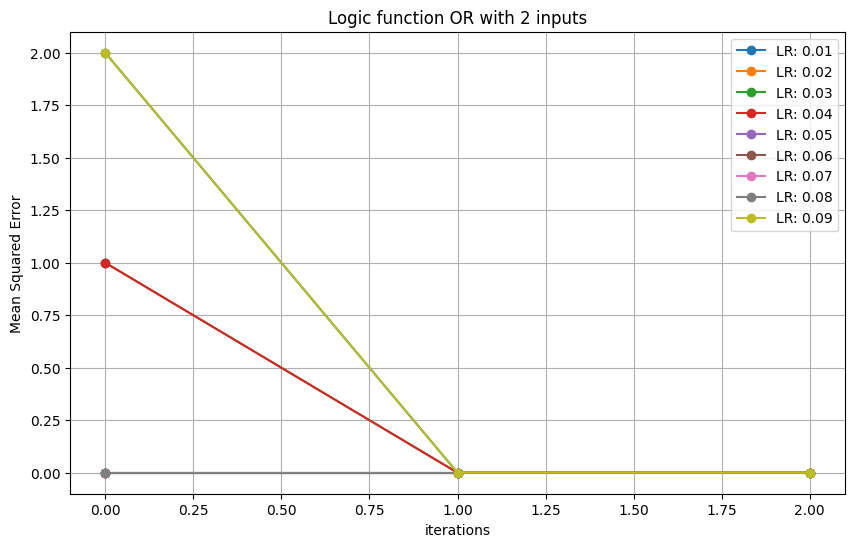

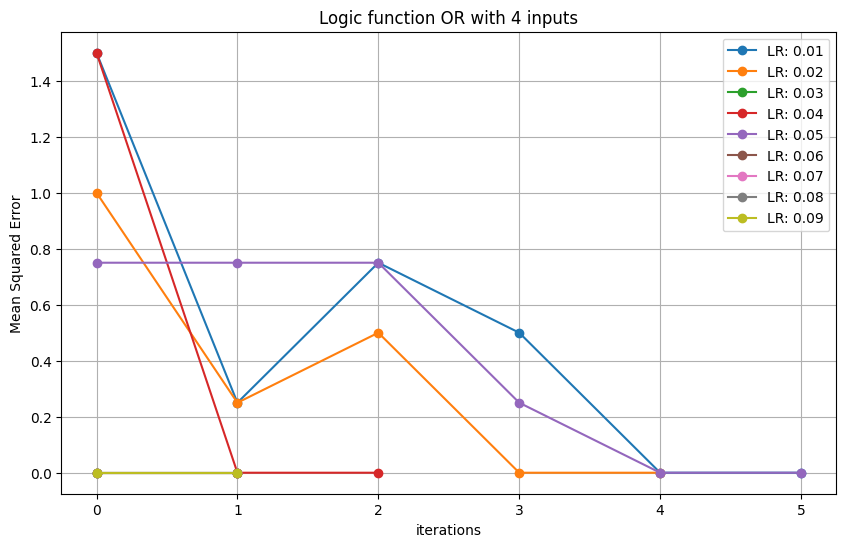

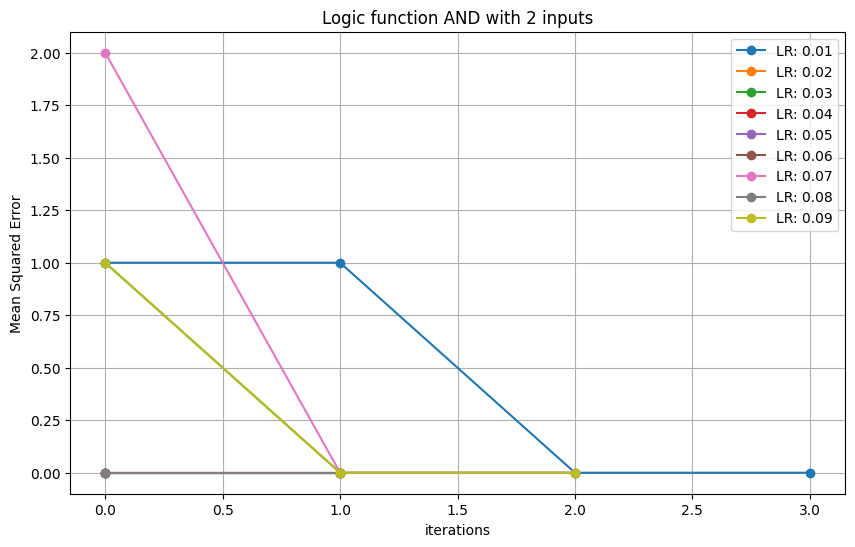

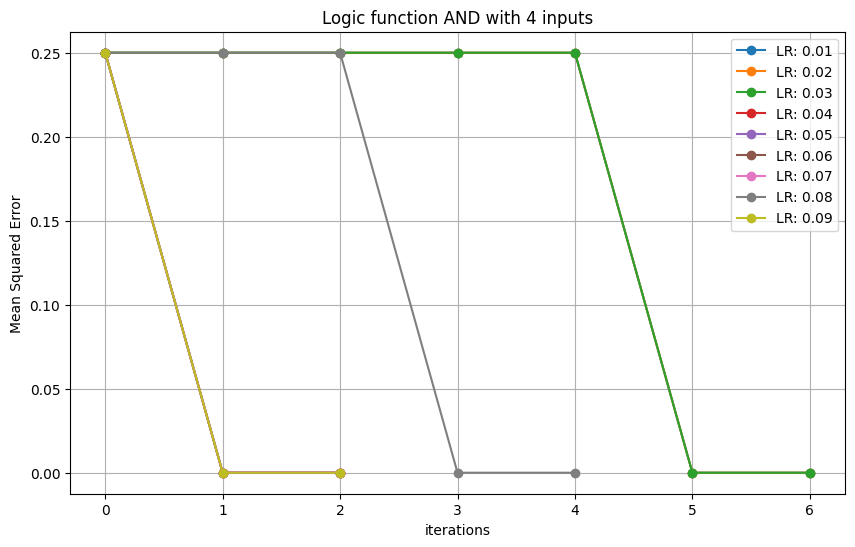

In [123]:
learning_rates = np.arange(0.01, 0.1, 0.01)
Xs = [X2, X4, X2, X4]
Ys = [YOr2, YOr4, YAnd2, YAnd4]
display(learning_rates)
for x, y in zip(Xs, Ys):
    for i, nu in enumerate(learning_rates):
        per = Perceptron()
        per.train(x, y, nu)

        gate_type = "OR" if np.array_equal(y, YOr2) or np.array_equal(y, YOr4) else "AND"
        plot_errors(per.error_list, learning_rates, f"Logic function {gate_type} with {x.shape[1]} inputs", i+1)

In [63]:
def plot_perceptron(input, target, title) -> None:
    """
    Plots the decision boundary of the trained perceptron along with the data points.
    """
    per = Perceptron()
    per.train(input, target, learning_rate=0.1)

    plt.figure(figsize=(8, 6))

    # Data points
    plt.scatter(input[:, 0], input[:, 1], c=target, edgecolors='k', label='Data Points')

    # Decision boundary
    x = np.linspace(-2, 2, 1000)
    y = np.linspace(-2, 2, 1000)
    XX, YY = np.meshgrid(x, y)
    grid = np.column_stack((XX.ravel(), YY.ravel()))
    Z = per.predict(grid).reshape(XX.shape)
    plt.contourf(XX, YY, Z, levels = [-1, 0, 1], alpha = 0.4, linestyles = 'solid')

    # Decision boundary line
    plt.plot(x, (-per.weights[1] * x - per.weights[0]) / per.weights[1], color = 'black', label = 'Decision Boundary')

    plt.title(title)
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.legend()
    plt.show()

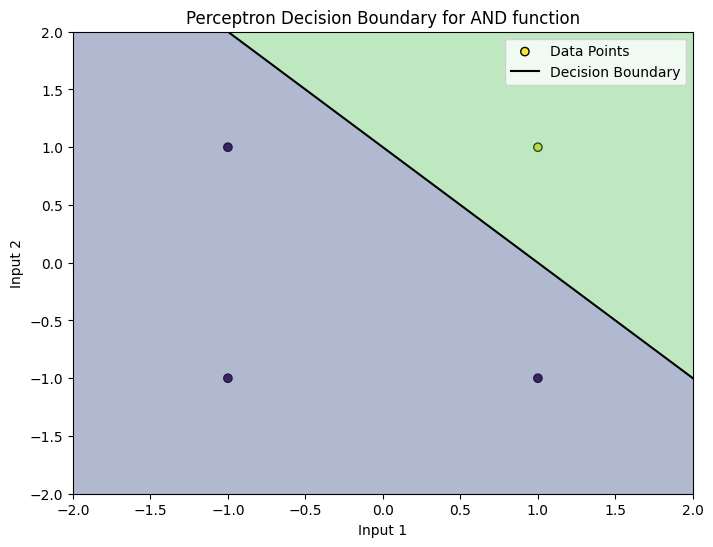

In [64]:
plot_perceptron(X2, YAnd2, "Perceptron Decision Boundary for AND function")

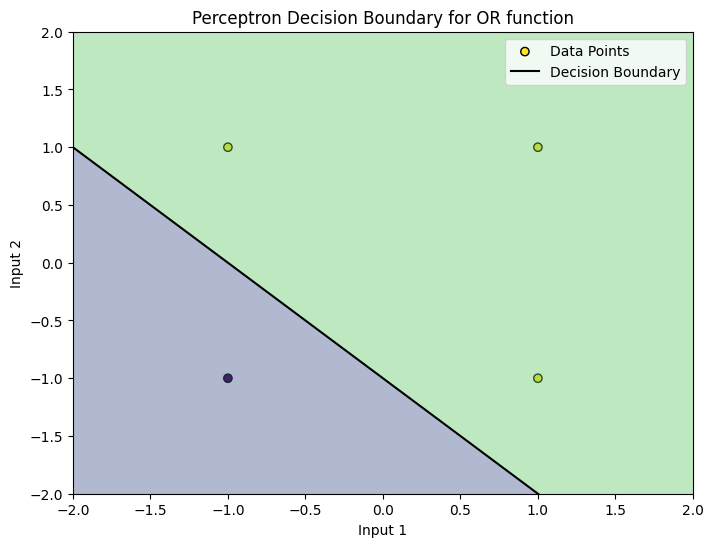

In [65]:
plot_perceptron(X2, YOr2, "Perceptron Decision Boundary for OR function")

<div style="text-align: left;">
  <h4><b>Ejercicio 2</b></h4>
</div>

**Determine numéricamente cómo varía la capacidad del perceptrón simple en función del número de patrones enseñados.**

In [66]:
def plot_capacities(patterns_range, features_range, n_problems) -> None:
    """
    Plots the capacity of the perceptron for different numbers of features.
    """
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

    plt.figure(figsize=(10, 6))
    for idx, n_features in enumerate(features_range):
        capacities = []
        for n_patterns in patterns_range:
            per = Perceptron()
            capacity = per.capacity(n_patterns, n_features, n_problems)
            capacities.append(capacity)

        plt.plot(patterns_range, capacities, color=colors[idx], label=f"N features = {n_features}")
        plt.axvline(x=2*n_features, linestyle='--', color=colors[idx], alpha=0.7, label=f'$2 N_\\text{{features}} = {2*n_features}$')
        plt.title(f"Perceptron Capacity")
        plt.xlabel("Number of Patterns")
        plt.ylabel("Capacity (Fraction of Linearly Separable Problems)")
        plt.grid()
        plt.legend()

    plt.show()

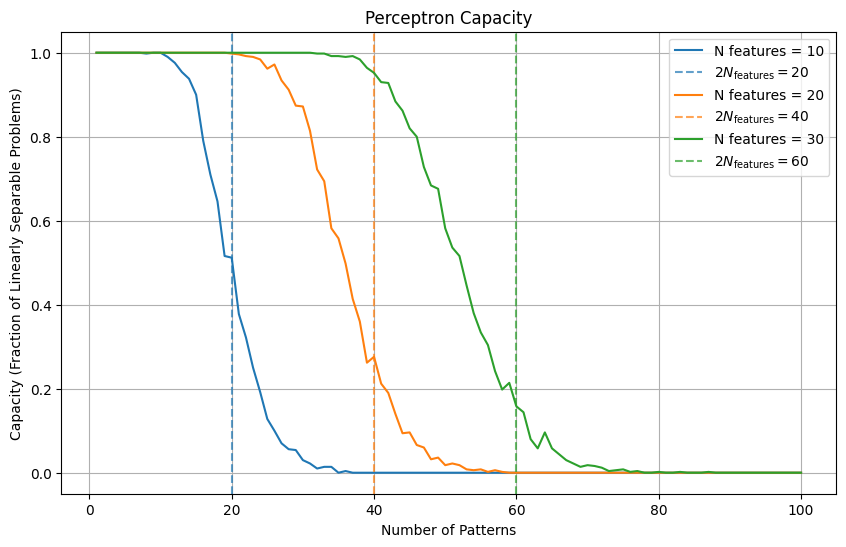

In [67]:
patterns_range = range(1, 101)
features_range = [10, 20, 30]
plot_capacities(patterns_range, features_range, n_problems=500)

<div style="text-align: left;">
  <h4><b>Ejercicio 3</b></h4>
</div>

**Implemente un perceptrón multicapa que aprenda la función lógica XOR de $2$ y de $4$ entradas (utilizando el algoritmo *Backpropagation* y actualizando en *batch*). Muestre cómo evoluciona el error durante el entrenamiento.**

**XOR (2 entradas)**

<table align="center"> 
  <tr> 
    <th style="text-align:center;">X₁</th> 
    <th style="text-align:center;">X₂</th> 
    <th style="text-align:center;">Y</th> 
  </tr> 
  <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr> 
  <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr> 
  <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr> 
  <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr> 
</table>


**XOR (4 entradas)**

<table align="center" style="border:none;"> 
<tr> 
<!-- Primera tabla (8 filas) --> 
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
</table>
</td>

<!-- Columna vacía -->
<td style="width:40px; border:none;"></td>

<!-- Segunda tabla (8 filas) -->
<td valign="top" style="border:none;">
<table>
    <tr><th style="text-align:center;">X₁</th><th style="text-align:center;">X₂</th><th style="text-align:center;">X₃</th><th style="text-align:center;">X₄</th><th style="text-align:center;">Y</th></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">1</td><td style="text-align:center;">1</td></tr>
    <tr><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td><td style="text-align:center;">-1</td></tr>
</table>
</td>
</tr> 
</table>

In [68]:
X2, YXor2 = logic_vectors("XOR", 2)
X4, YXor4 = logic_vectors("XOR", 4)

X1,X2,Y
1,1,-1
1,-1,1
-1,1,1
-1,-1,-1


X1,X2,X3,X4,Y
1,1,1,1,-1
1,1,1,-1,1
1,1,-1,1,1
1,1,-1,-1,-1
1,-1,1,1,1
1,-1,1,-1,-1
1,-1,-1,1,-1
1,-1,-1,-1,1
-1,1,1,1,1
-1,1,1,-1,-1


In [69]:
class MultiLayerPerceptron:
    def __init__(self, layers_config, act_hidden, der_act_hidden, act_output, der_act_output):

        if layers_config is None or layers_config[-1] != 1:
            raise ValueError("A valid layers configuration must be provided.")
        if act_output is None or der_act_output is None:
            raise ValueError("Output activation function and its derivative must be provided.")
        if act_hidden is None or der_act_hidden is None:
            raise ValueError("Hidden activation function and its derivative must be provided.")
        
        self.layers = layers_config

        self.act_hidden = act_hidden
        self.der_act_hidden = der_act_hidden
        self.act_hidden_name = act_hidden.__name__.lower()

        self.act_output = act_output
        self.der_act_output = der_act_output
        self.act_output_name = act_output.__name__.lower()

        self.weights, self.biases = self.__initialize_weights()
        self.errors = None
        self.val_errors = None

    def forward_pass(self, input) -> Tuple[np.ndarray, np.ndarray, list, list]:
        """ 
        Perform a forward pass through the network.
        """
        preacts, acts = [], [input]

        for W, b in zip(self.weights[:-1], self.biases[:-1]):
            preact = input @ W + b
            input = self.act_hidden(preact)
            preacts.append(preact)
            acts.append(input)

        output_preact = input @ self.weights[-1] + self.biases[-1]
        output = self.act_output(output_preact)
        preacts.append(output_preact)
        acts.append(output)

        return output, output_preact, preacts, acts

    def backpropagation(self, input, target, learning_rate, batch_size=None, val_input=None, val_target=None, tol=0.005, max_epochs=10000) -> Tuple[int, float]:
        """
        Train the MLP using backpropagation.
        """
        target = target.reshape(-1, 1) # Ensure target is a column vector
        if self.act_output_name == 'sigmoid':
            target = (target + 1) / 2

        N = input.shape[0]
        if batch_size is None or batch_size > N: # Added batch size check
            batch_size = N

        output, output_preact, preacts, acts = self.forward_pass(input)
        error = self.__MS_error(output, target)
        
        self.errors = []
        self.val_errors = []
        epochs = 0
        while error >= tol and epochs < max_epochs:
            input, target = self.__shuffle_data(input, target, batch_size)

            for start in range(0, N, batch_size):
                end = start + batch_size
                input_batch, target_batch = input[start:end], target[start:end]

                output, output_preact, preacts, acts = self.forward_pass(input_batch)
                
                deltas = [None] * len(self.weights)
                deltas[-1] = (output - target_batch) * self.der_act_output(output_preact)

                for idx_layer in reversed(range(len(self.weights) - 1)):
                    deltas[idx_layer] = self.der_act_hidden(preacts[idx_layer]) * (deltas[idx_layer + 1] @ self.weights[idx_layer + 1].T)
            
                for idx_layer in range(len(self.weights)):
                    grad_weights = (acts[idx_layer].T @ deltas[idx_layer]) / input_batch.shape[0]
                    grad_bias = np.mean(deltas[idx_layer], axis=0, keepdims=True)

                    self.weights[idx_layer] -= learning_rate * grad_weights
                    self.biases[idx_layer] -= learning_rate * grad_bias

            if val_input is not None and val_target is not None:
                val_target = val_target.reshape(-1, 1)
                val_output, _, _, _ = self.forward_pass(val_input)
                val_error = self.__MS_error(val_output, val_target)
                self.val_errors.append(val_error)

            output, output_preact, preacts, acts = self.forward_pass(input)
            error = self.__MS_error(output, target)
            self.errors.append(error)
            epochs += 1
        
        return epochs, error
    
    def simulated_annealing(self, input, target, initial_temp=1.0, alpha=0.9, step_size=0.1, val_input=None, val_target=None, tol=0.005, max_epochs=10000) -> Tuple[int, float]:
        """
        Train the MLP using simulated annealing.
        """
        target = target.reshape(-1, 1) # Ensure target is a column vector
        if self.act_output_name == 'sigmoid':
            target = (target + 1) / 2

        output, _, _, _ = self.forward_pass(input)
        current_error = self.__MS_error(output, target)

        best_error = current_error
        best_weights = [W.copy() for W in self.weights]
        best_biases = [b.copy() for b in self.biases]
        
        T = initial_temp
        self.errors = []
        self.val_errors = []
        epoch = 0
        while best_error > tol and epoch < max_epochs:
            old_weights = [W.copy() for W in self.weights]
            old_biases = [b.copy() for b in self.biases]

            # Weights perturbation
            w_idx = np.random.randint(len(self.weights))
            W = self.weights[w_idx]
            wi, wj = np.random.randint(W.shape[0]), np.random.randint(W.shape[1])
            self.weights[w_idx][wi, wj] += step_size * np.random.normal()

            # Bias perturbation
            b_idx = np.random.randint(len(self.biases))
            B = self.biases[b_idx]
            bk = np.random.randint(B.shape[1])
            self.biases[b_idx][0, bk] += step_size * np.random.normal()

            output, _, _, _ = self.forward_pass(input)
            new_error = self.__MS_error(output, target)
            delta_error = new_error - current_error

            if delta_error <= 0 or np.random.rand() < np.exp(-delta_error / T):
                current_error = new_error
                if new_error < best_error:
                    best_error = new_error
                    best_weights = [W.copy() for W in self.weights]
                    best_biases = [b.copy() for b in self.biases]
            
            else:
                self.weights = old_weights
                self.biases = old_biases

            if val_input is not None and val_target is not None:
                val_target = val_target.reshape(-1, 1)
                val_output, _, _, _ = self.forward_pass(val_input)
                val_error = self.__MS_error(val_output, val_target)
                self.val_errors.append(val_error)

            self.errors.append(current_error)

            T *= alpha
            epoch += 1

        self.weights = best_weights
        self.biases = best_biases

        return epoch, best_error

    def predict(self, input) -> np.ndarray:
        """
        Predicts the output for the given input using the trained weights.
        """
        output, _, _, _ = self.forward_pass(input)
        
        if self.act_output_name == 'tanh':
            return np.where(output >= 0, 1, -1)
        elif self.act_output_name == 'linear':
            return output
        else:
            return np.where(output >= 0.5, 1, -1)
    
    # --- Auxiliary methods ---

    def __initialize_weights(self) -> Tuple[list, list]:
        """
        Initialize weights and biases for each layer.
        """
        acts_supported = ['sigmoid', 'tanh', 'relu', 'linear']
        if not any(name in self.act_hidden_name for name in acts_supported):
            raise ValueError(f"act function '{self.act_hidden_name}' is not supported.")
        if not any(name in self.act_output_name for name in acts_supported):
            raise ValueError(f"output act function '{self.act_output_name}' is not supported.")

        W, b = [], []
        for n_in, n_out in zip(self.layers[:-1], self.layers[1:]):
            # if act_name == acts_supported[2]: # ReLU
            #     W_aux = np.random.normal(0, np.sqrt(2. / n_in), (n_in, n_out))
            #     W.append(W_aux)
        
            lim = np.sqrt(6. / (n_in + n_out))
            W_aux = np.random.uniform(-lim, lim, (n_in, n_out))
            W.append(W_aux)
            b.append(np.zeros((1, n_out)))
            
        return W, b

    def __shuffle_data(self, input, target, batch_size) -> Tuple[np.ndarray, np.ndarray]:
        """
        Shuffle input and target data.
        """
        if batch_size < input.shape[0]:
            idx_perm = np.random.permutation(input.shape[0])
            input = input[idx_perm]
            target = target[idx_perm]

        return input, target
    
    def __MS_error(self, output, target) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

In [70]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def der_sigmoid(x): return sigmoid(x) * (1 - sigmoid(x))
def der_tanh(x): return 1 - np.tanh(x) ** 2
def linear(x): return x
def der_linear(x): return np.ones_like(x)

In [71]:
def plot_errors_mlp(mlp, input, target, learning_rate, max_epochs, title, val_input=None, val_target=None, batch_size=None, sa=False):
    """
    Plot training and validation errors over epochs for the MLP.
    """
    if sa:
        epochs, last_error = mlp.simulated_annealing(input, target, val_input=val_input, val_target=val_target, max_epochs=max_epochs)
    else:
        epochs, last_error = mlp.backpropagation(input, target, learning_rate, val_input=val_input, val_target=val_target, max_epochs=max_epochs, batch_size=batch_size)
    
    plt.figure(figsize=(10, 6))
    plt.plot(mlp.errors, label='Training Error')
    if val_input is not None and val_target is not None:
        plt.plot(mlp.val_errors, label='Validation Error')
    
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.legend()
    plt.show()

    display(HTML(f"<b>Final MSE for training after {epochs} epochs: {last_error:.4f}</b>"))
    if val_input is not None and val_target is not None:
        display(HTML(f"<b>Final MSE for validation after {epochs} epochs: {mlp.val_errors[-1]:.4f}</b>"))

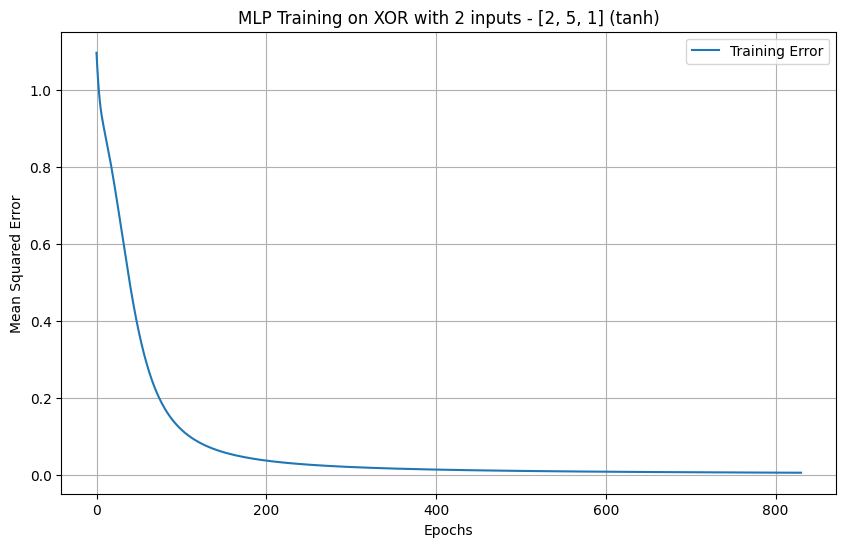

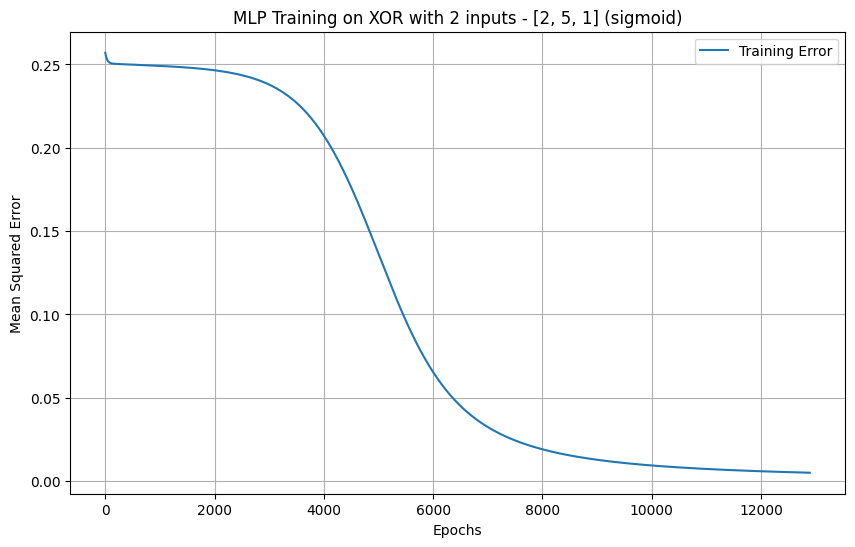

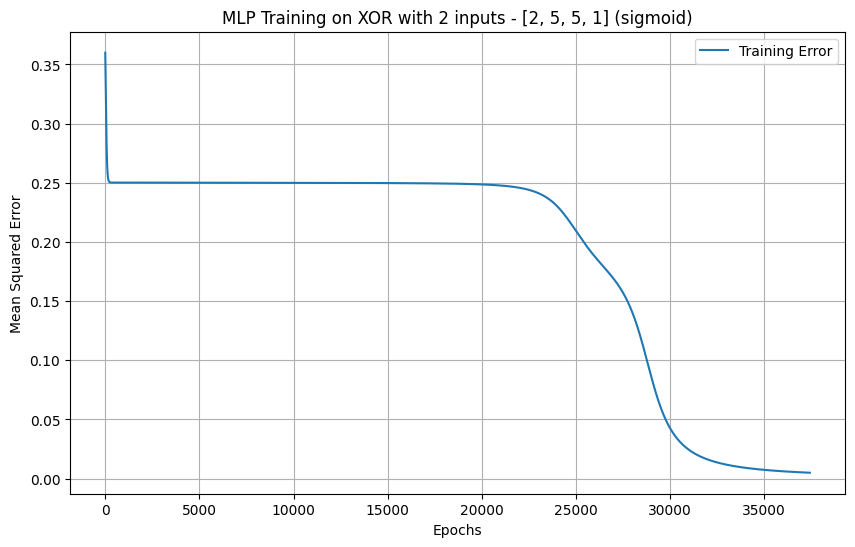

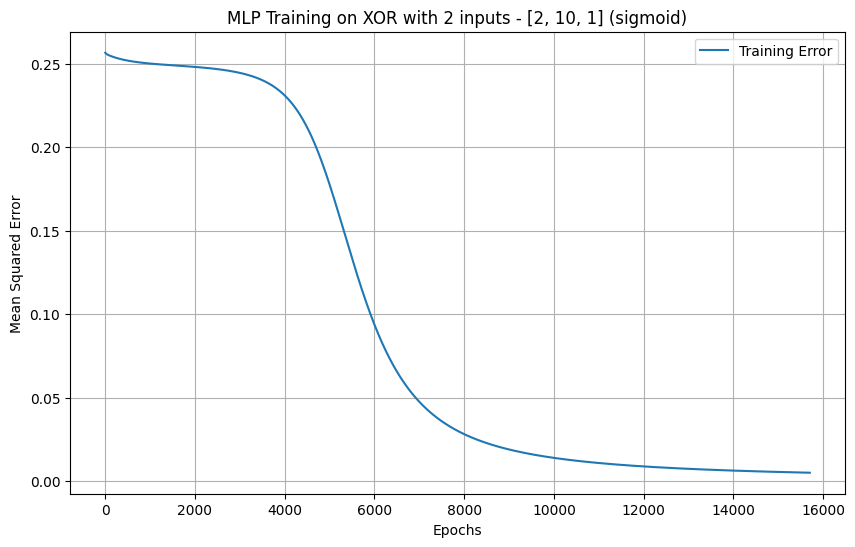

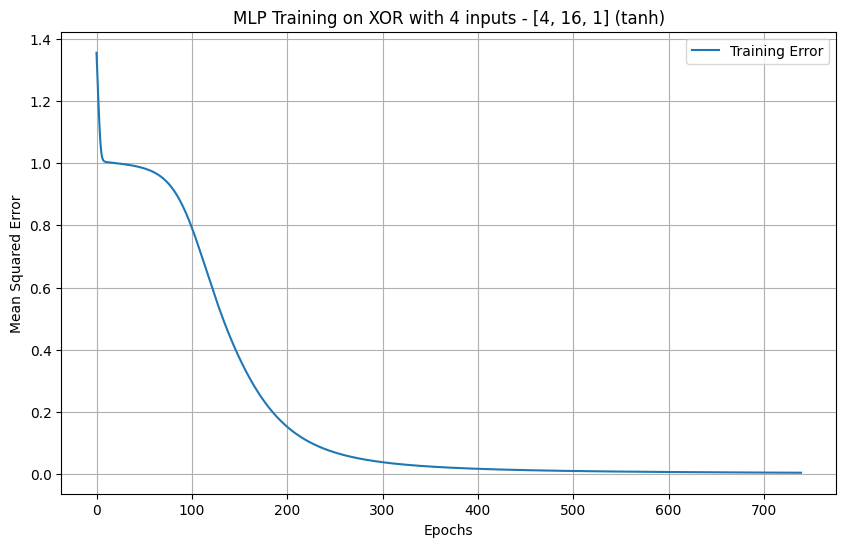

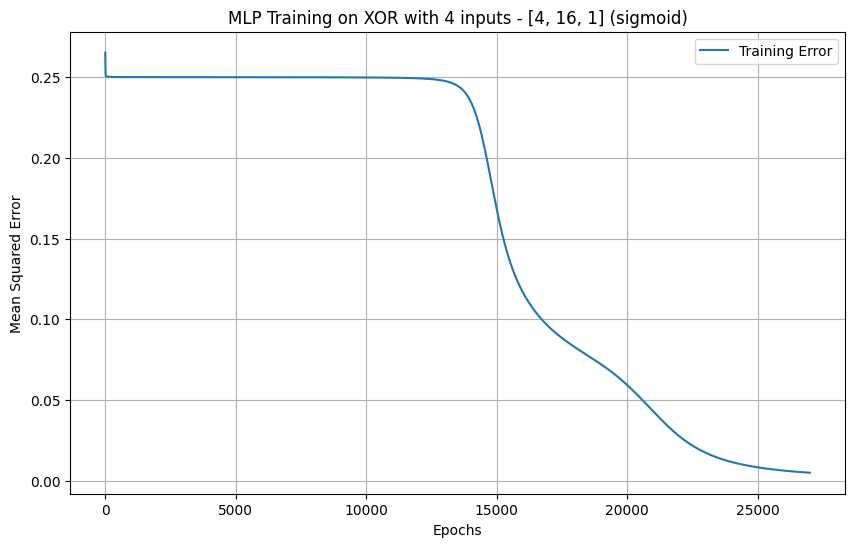

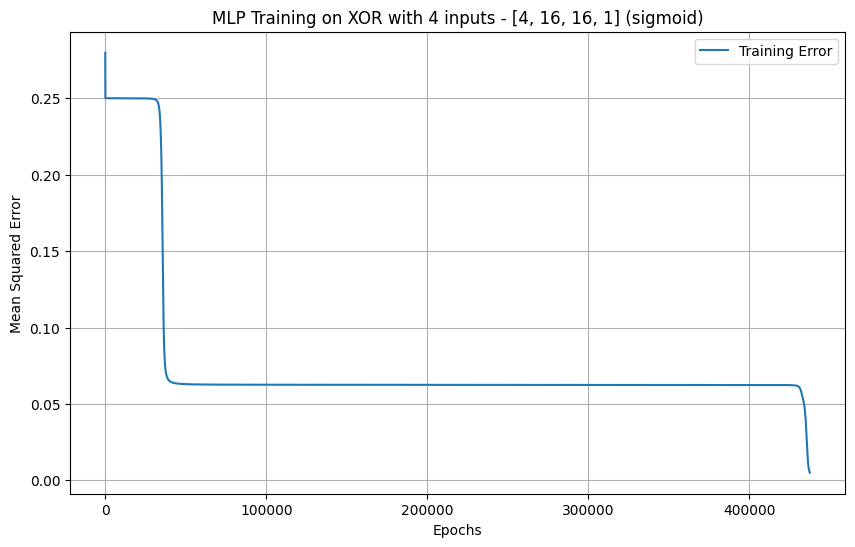

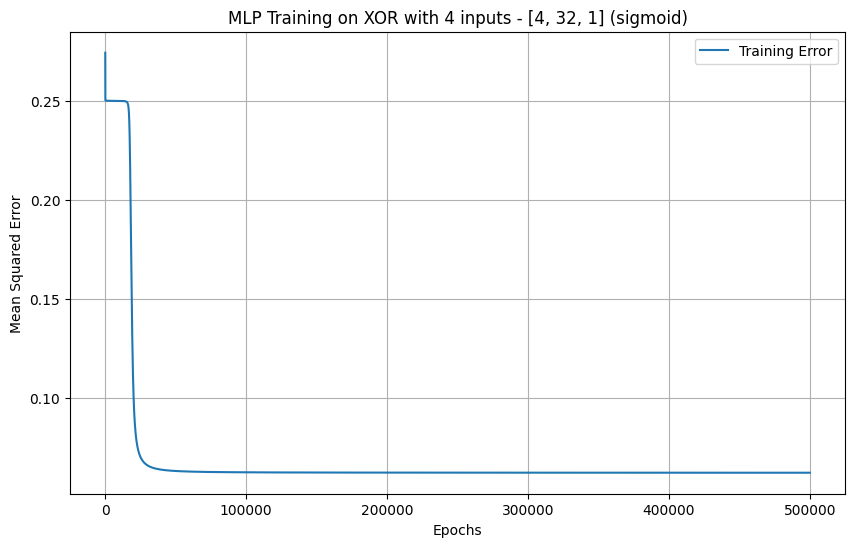

In [72]:
# MLP tanh for XOR with 2 inputs
MLP2_tanh = MultiLayerPerceptron(layers_config=[2, 5, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP2_tanh, X2, YXor2, learning_rate=0.1, max_epochs=10000, title="MLP Training on XOR with 2 inputs - [2, 5, 1] (tanh)")

# MLP sigmoid for XOR with 2 inputs
MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 5, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 5, 1] (sigmoid)")

MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 5, 5, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 5, 5, 1] (sigmoid)")

MLP2_sigmoid = MultiLayerPerceptron(layers_config=[2, 10, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP2_sigmoid, X2, YXor2, learning_rate=0.1, max_epochs=100000, title="MLP Training on XOR with 2 inputs - [2, 10, 1] (sigmoid)")

# MLP tanh for XOR with 4 inputs
MLP4_tanh = MultiLayerPerceptron(layers_config=[4, 16, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=np.tanh, der_act_output=der_tanh)
plot_errors_mlp(MLP4_tanh, X4, YXor4, learning_rate=0.2, max_epochs=100000, title="MLP Training on XOR with 4 inputs - [4, 16, 1] (tanh)")

# MLP sigmoid for XOR with 4 inputs
MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 16, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 16, 1] (sigmoid)")

MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 16, 16, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 16, 16, 1] (sigmoid)")

MLP4_sigmoid = MultiLayerPerceptron(layers_config=[4, 32, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP4_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP Training on XOR with 4 inputs - [4, 32, 1] (sigmoid)")


<div style="text-align: left;">
  <h4><b>Ejercicio 4</b></h4>
</div>

**(A). Implemente una red con aprendizaje *Backpropagation* que aprenda la siguiente función:**

$$ f(x, ~ y, ~ z) = \sin (x) + \cos(y) + z$$

**donde: $x, ~ y \in [0, ~ 2\pi]$ y $z\in [-1, ~1]$. Para ello construya un conjunto de datos de entrenamiento y un conjunto de evaluación. Muestre la evolución del error de entrenamiento y de evaluación en función de las épocas de entrenamiento.** 

In [73]:
def generate_dataset(n_samples, train_size=0.8):
    """
    Generate a dataset for the function f(x, y, z) = sin(x) + cos(y) + z
    where x, y in [0, 2pi] and z in [-1, 1].  
    """
    if n_samples <= 0:
        raise ValueError("n_samples must be a positive integer.")
    
    x = np.random.uniform(0, 2 * np.pi, n_samples)
    y = np.random.uniform(0, 2 * np.pi, n_samples)
    z = np.random.uniform(-1, 1, n_samples)
    f = np.sin(x) + np.cos(y) + z
    
    X = np.column_stack((x, y, z))
    Y = f.reshape(-1, 1)

    train_samples = int(n_samples * train_size)
    X_train, X_test = X[:train_samples], X[train_samples:]
    Y_train, Y_test = Y[:train_samples], Y[train_samples:]
    
    return X_train, Y_train, X_test, Y_test

In [74]:
n_samples = 1000
X_train, Y_train, X_test, Y_test = generate_dataset(n_samples, train_size=0.8)
display(HTML(f"<b>Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}</b>"))

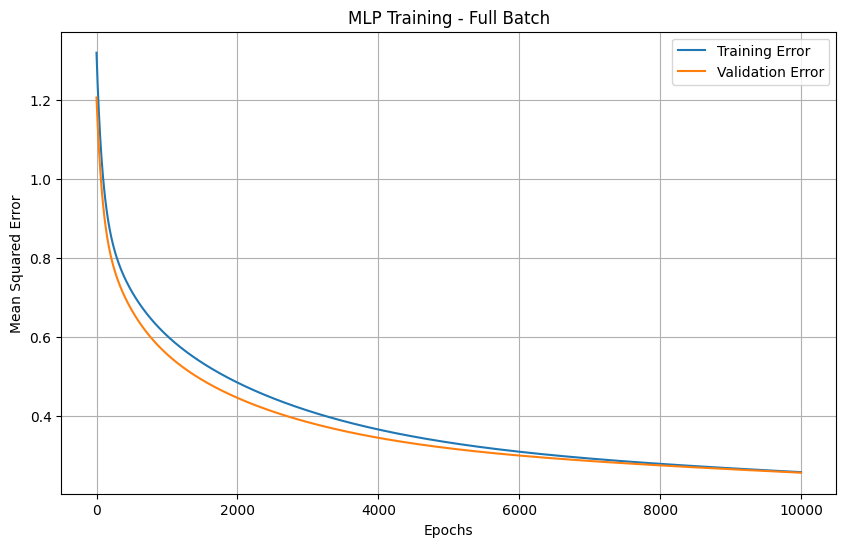

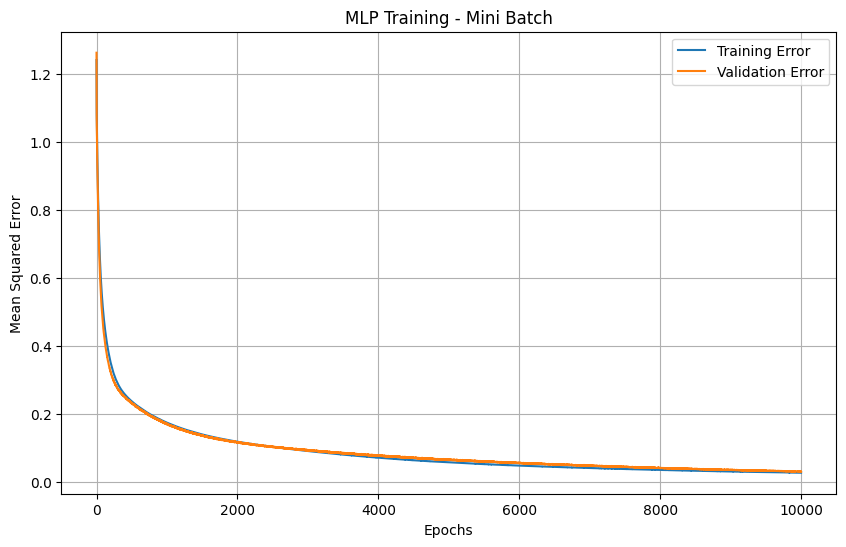

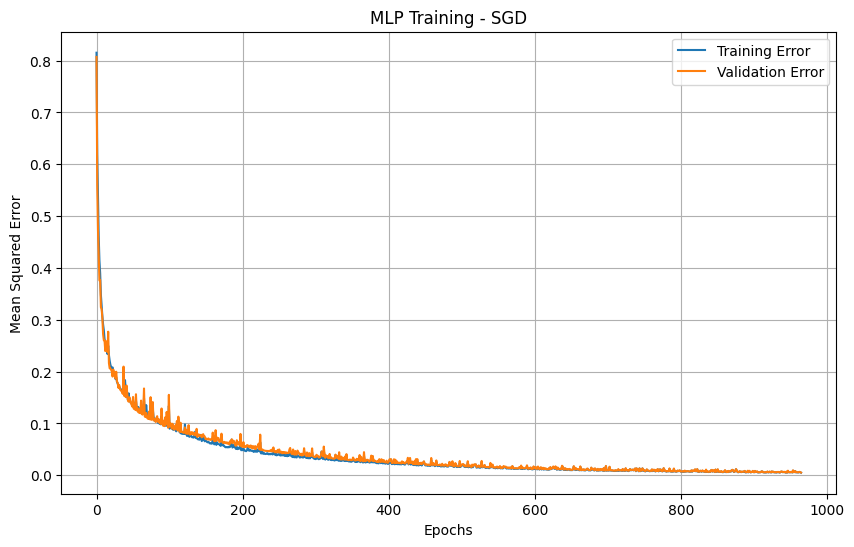

In [75]:
# Full-Batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - Full Batch", val_input=X_test, val_target=Y_test)

# Mini-Batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - Mini Batch", val_input=X_test, val_target=Y_test, batch_size=32)

# Stochastic Gradient Descent (SGD) Training
MLP = MultiLayerPerceptron(layers_config=[3, 50, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.001, max_epochs=10000, title="MLP Training - SGD", val_input=X_test, val_target=Y_test, batch_size=1)


**(B). Estudie la evolución de los errores durante el entrenamiento de una red con una capa oculta de $30$ neuronas cuando el conjunto de entrenamiento contiene $40$ muestras. ¿Qué ocurre si el minibatch tiene tamaño $40$? ¿Y si tiene tamaño $1$?**

In [76]:
n_samples = 100
X_train, Y_train, X_test, Y_test = generate_dataset(n_samples, train_size=0.4)
display(HTML(f"<b>Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}</b>"))

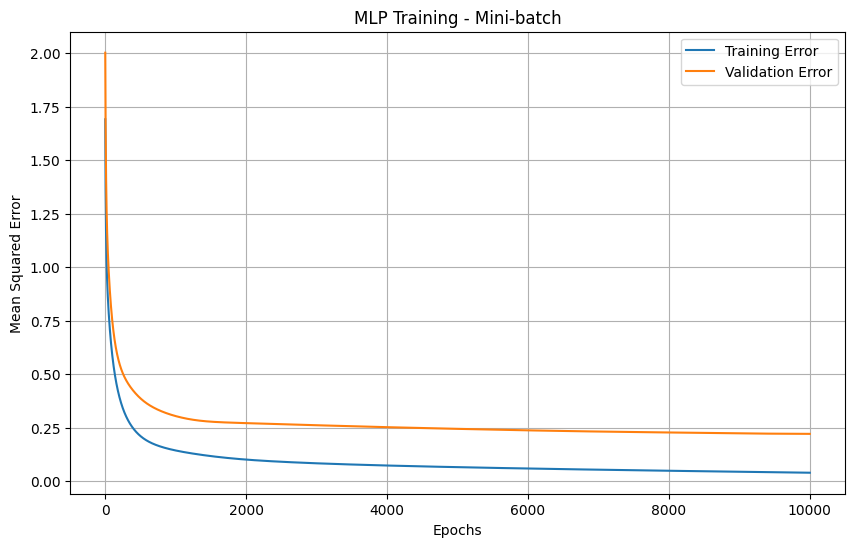

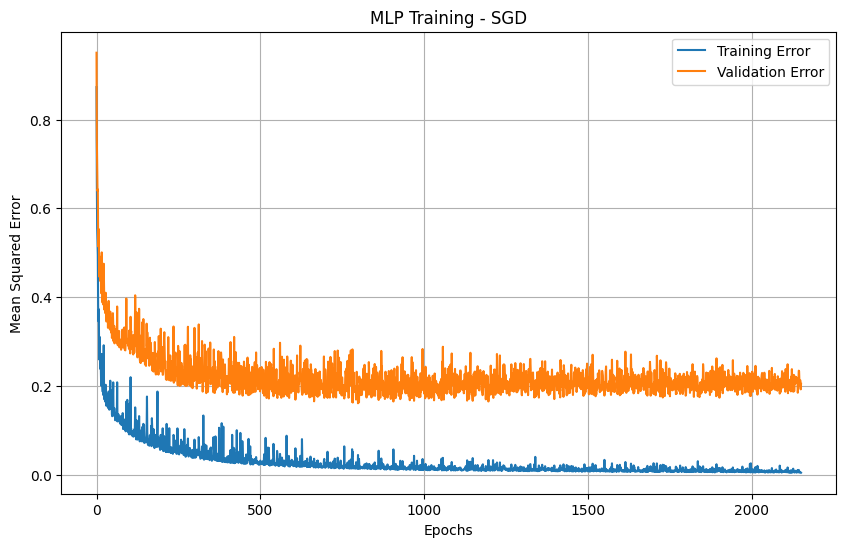

In [77]:
# Mini-batch Training
MLP = MultiLayerPerceptron(layers_config=[3, 30, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.01, max_epochs=10000, title="MLP Training - Mini-batch", val_input=X_test, val_target=Y_test, batch_size=40)

# Stochastic Gradient Descent (SGD) Training
MLP = MultiLayerPerceptron(layers_config=[3, 30, 1], act_hidden=np.tanh, der_act_hidden=der_tanh, act_output=linear, der_act_output=der_linear)
plot_errors_mlp(MLP, X_train, Y_train, learning_rate=0.01, max_epochs=10000, title="MLP Training - SGD", val_input=X_test, val_target=Y_test, batch_size=1)

<div style="text-align: left;">
  <h4><b>Ejercicio 5</b></h4>
</div>

**Siguiendo el trabajo de Hinton y Salakhutdinov ($2006$), entrene una máquina restringida de Boltzmann con imágenes de la base de datos MNIST. Muestre el error de recontruccion durante el entrenamiento, y ejemplos de cada uno de los dígitos reconstruidos.**

In [78]:
class RestrictedBoltzmannMachine:
    
    def __init__(self) -> None:
        self.n_hidden = None
        self.n_visible = None
        self.weights = None
        self.visible_bias = None
        self.hidden_bias = None
        self.errors = None

    def train(self, input, n_hidden, learning_rate, batch_size, max_epochs=1000) -> Tuple[int, float]:
        """
        Train the RBM using Contrastive Divergence.
        """
        N, self.n_visible = input.shape
        self.n_hidden = n_hidden
        self.__initialize_weights()

        self.errors = []
        epoch = 0
        while epoch < max_epochs:
            input_batch = self.__shuffle_data(input, batch_size)

            epoch_error = 0
            real_size = 0
            for start in range(0, N, batch_size):
                end = start + batch_size
                input_state = input_batch[start:end]
                batch_size = input_state.shape[0]

                hidden_prob, hidden_state = self.__transform(input_state)
                recon_prob, recon_state = self.__inverse_transform(hidden_state)
                hidden_prob_recon, _ = self.__transform(recon_state)

                self.weights += learning_rate * ((input_state.T @ hidden_prob - recon_state.T @ hidden_prob_recon) / batch_size)
                self.visible_bias += learning_rate * np.mean(input_state - recon_state, axis=0)
                self.hidden_bias += learning_rate * np.mean(hidden_prob - hidden_prob_recon, axis=0)

                batch_error = self.__MS_error(recon_prob, input_state)
                epoch_error += batch_error * batch_size # Scale by batch size (it can be smaller at the end)
                real_size += batch_size

            epoch += 1
            self.errors.append(epoch_error / real_size)
        
        return epoch, epoch_error / real_size

    def reconstruct(self, input) -> np.ndarray:
        """
        Reconstruct the input data through the RBM.
        """
        _, hidden_state = self.__transform(input)
        recon_prob, _ = self.__inverse_transform(hidden_state)

        return recon_prob
    
    # --- Auxiliary methods ---

    def __initialize_weights(self) -> None:
        """
        Initialize weights and biases.
        """
        self.weights = np.random.normal(0, 0.01, (self.n_visible, self.n_hidden))
        self.visible_bias = np.zeros(self.n_visible)
        self.hidden_bias = np.zeros(self.n_hidden)

    def __sigmoid(self, x) -> np.ndarray:
        """
        Sigmoid activation function.
        """
        return 1.0 / (1 + np.exp(-x))
    
    def __shuffle_data(self, input, batch_size) -> np.ndarray:
        """
        Shuffle input data.
        """
        if batch_size < input.shape[0]:
            idx_perm = np.random.permutation(input.shape[0])
            input = input[idx_perm]

        return input

    def __transform(self, input) -> np.ndarray:
        """
        Transform input data to hidden representation.
        """
        hidden_prob = self.__sigmoid(input @ self.weights + self.hidden_bias)
        hidden_state = (hidden_prob >= np.random.rand(*hidden_prob.shape)).astype(float)
        return hidden_prob, hidden_state

    def __inverse_transform(self, hidden) -> np.ndarray:
        """
        Transform hidden representation back to visible data.
        """
        visible_prob = self.__sigmoid(hidden @ self.weights.T + self.visible_bias)
        visible_state = (visible_prob >= np.random.rand(*visible_prob.shape)).astype(float)
        return visible_prob, visible_state
    
    def __MS_error(self, output, target) -> float:
        """
        Calculate the Mean Squared Error between output and target.
        """
        return np.mean((output - target) ** 2)

In [79]:
def plot_images(images, labels) -> None:
    """
    Plots a list of images in a single row.
    """
    if (len(images) == 0):
        raise ValueError("No images to display.")

    elif (len(images) == 1):
        plt.figure(figsize=(3.5, 5))
        plt.imshow(images[0], cmap='gray')
        plt.axis('off')

    else:
        size = (10, 5) if len(images) <= 5 else (20, 10)
        fig, axes = plt.subplots(1, len(images), figsize=size)
        for i, ax in enumerate(axes):
            ax.set_title(f"Label: {labels[i]}", fontsize=10, pad=10)
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
    plt.tight_layout()
    plt.show()

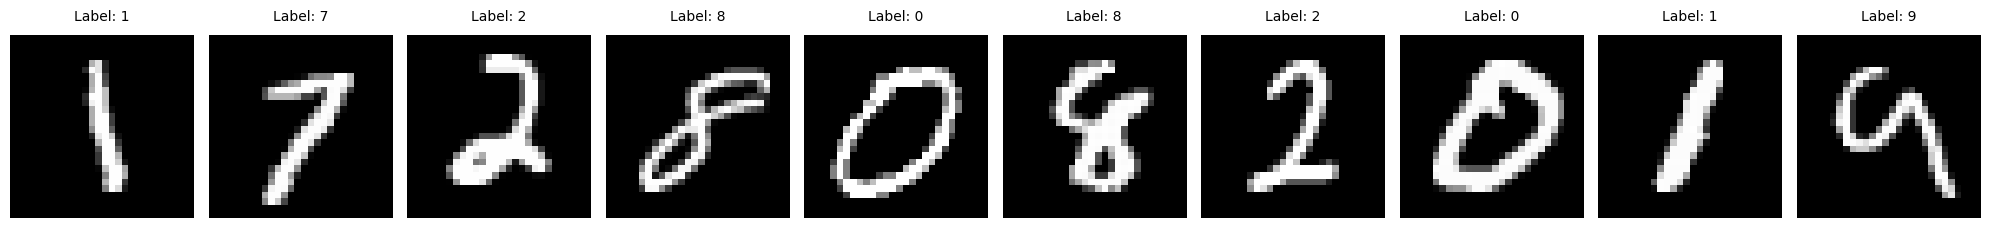

In [ ]:

from tensorflow.keras.datasets import mnist # type: ignore
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 10 random images from the training set to verify the data loading
indices = np.random.choice(X_train.shape[0], size=10, replace=False)
plot_images(X_train[indices], Y_train[indices])

In [81]:
def plot_errors_rbm(train_set, test_set, n_hidden, learning_rate, batch_size, max_epochs, title)-> np.ndarray:
    """
    Train RBM and plot training error over epochs.
    """

    display(HTML(f"<b>---- Training with {n_hidden} hidden units & lr = {learning_rate} ----</b>"))

    RBM = RestrictedBoltzmannMachine()
    epochs, last_error = RBM.train(train_set, n_hidden, learning_rate, batch_size, max_epochs)
    reconstructions = RBM.reconstruct(test_set)

    plt.figure(figsize=(10, 6))
    plt.plot(RBM.errors, marker='x', label='Training Error')
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Squared Error")
    plt.grid()
    plt.legend()
    plt.show()

    display(HTML(f"<b>Final MSE for training after {epochs} epochs: {last_error:.4f}</b>"))

    return reconstructions.reshape(-1, 28, 28)
    

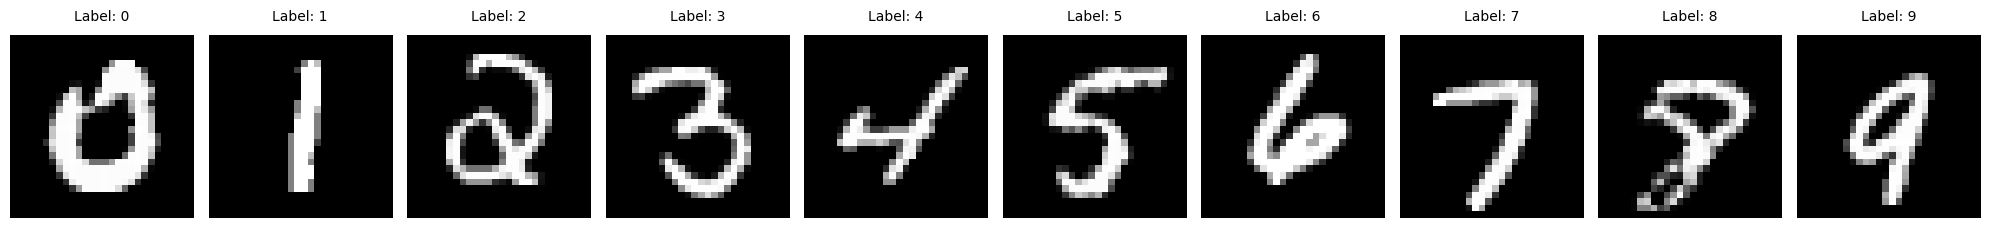

In [82]:
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

X_test_sample = []
aux_plot = []
Y_test_sample = []
for i in range(10):
    idx = np.where(Y_test == i)[0][np.random.choice(len(np.where(Y_test == i)[0]))] # Get random index for each digit
    X_test_sample.append(X_test[idx])
    Y_test_sample.append(Y_test[idx])
    aux_plot.append(X_test[idx].reshape(28, 28))

plot_images(aux_plot, Y_test_sample)

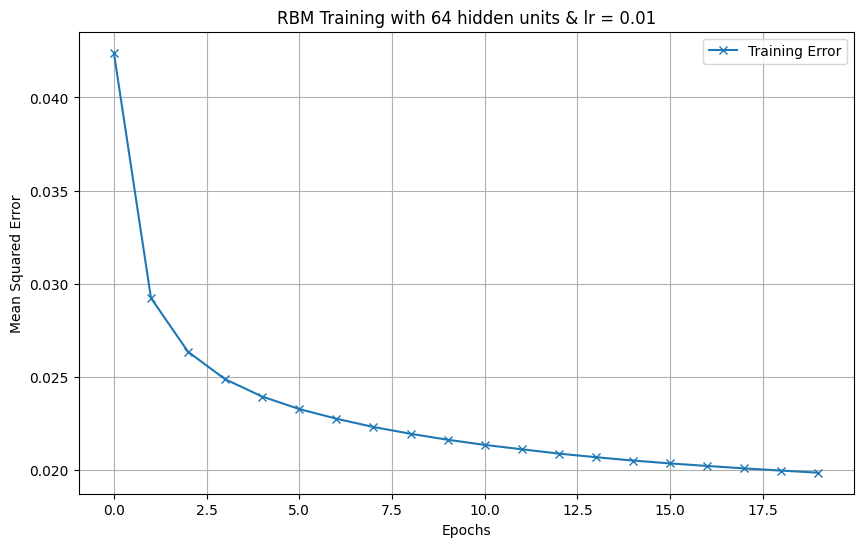

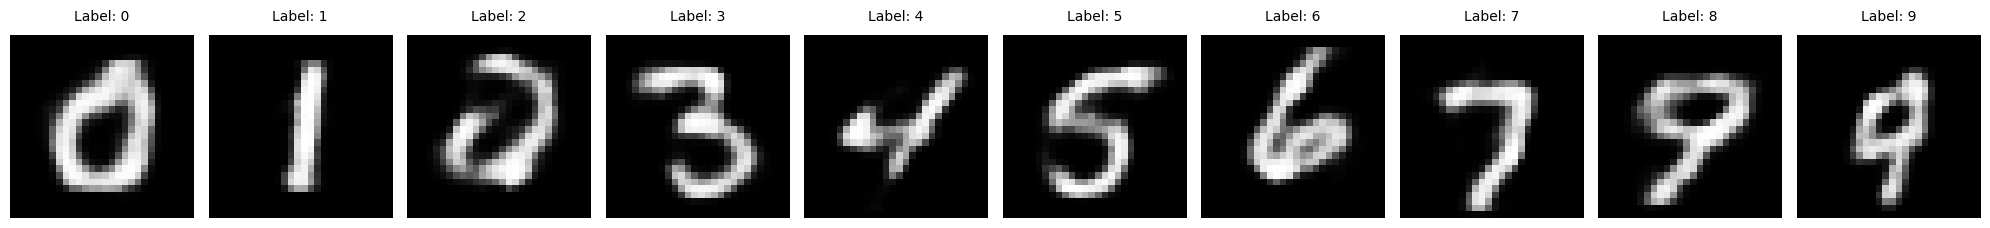

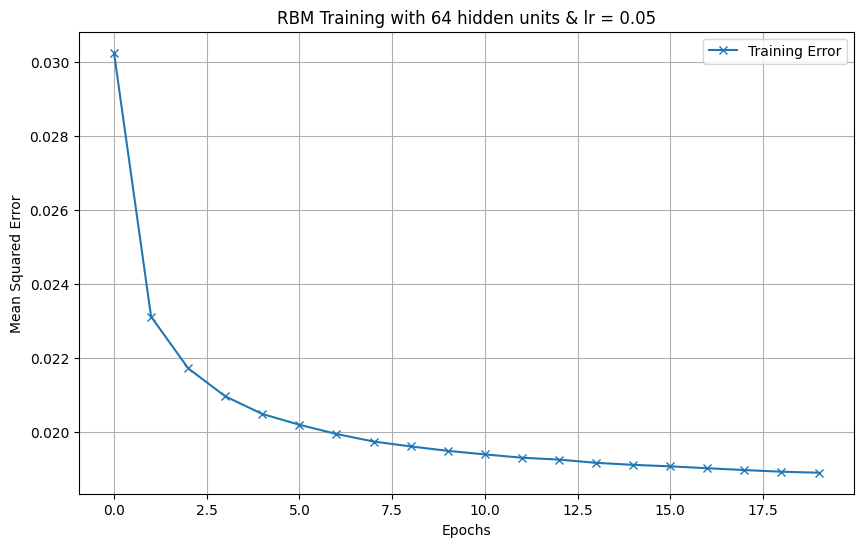

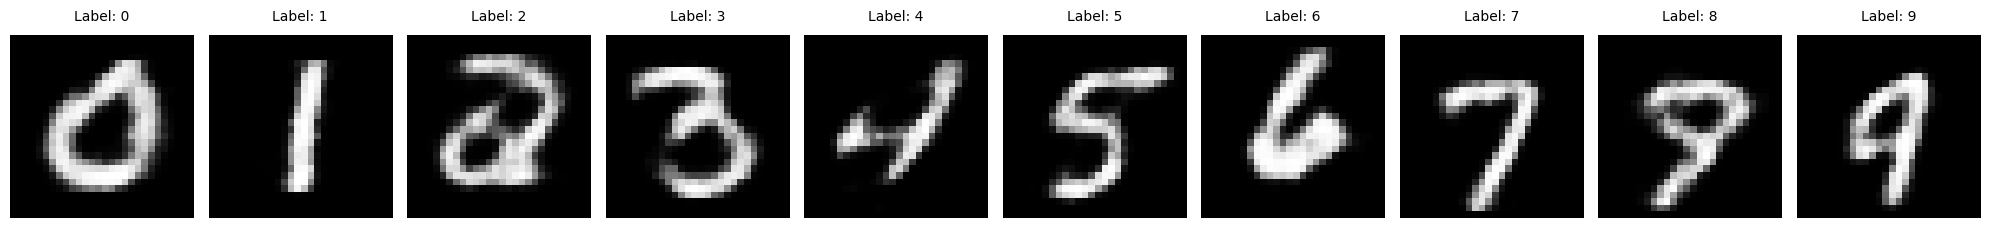

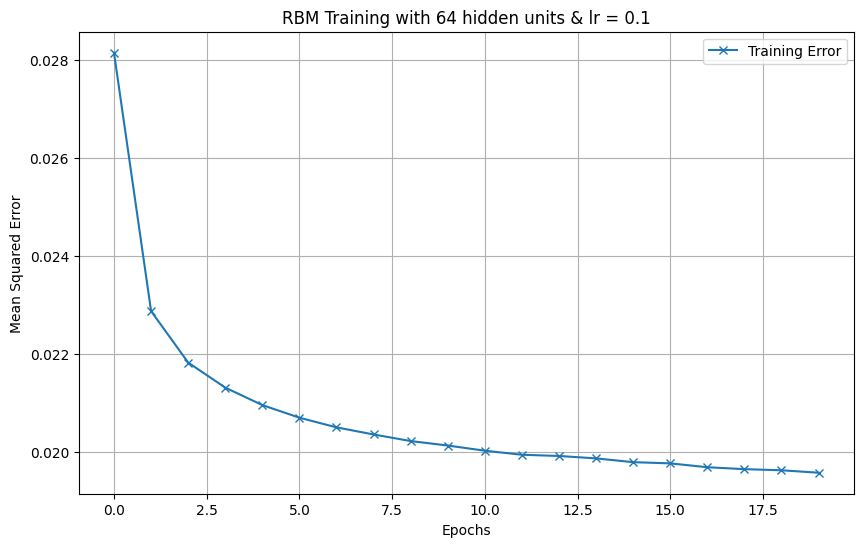

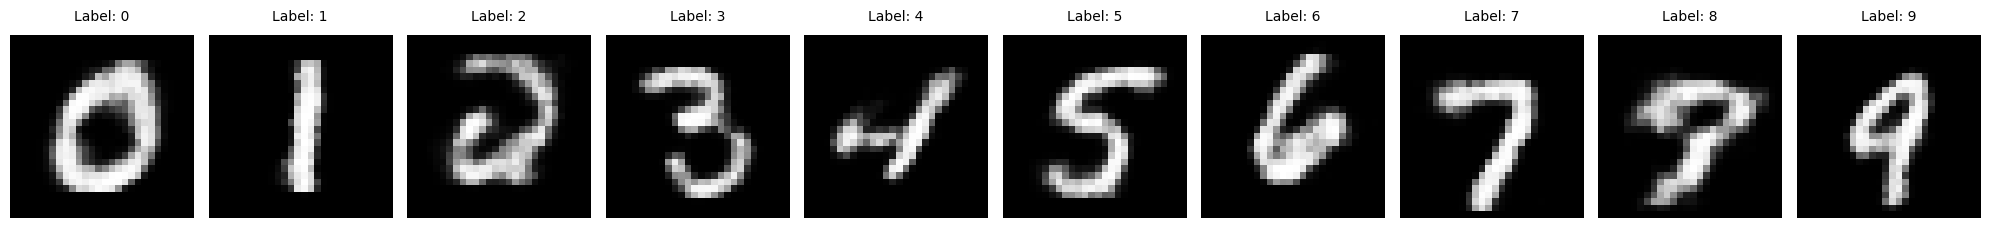

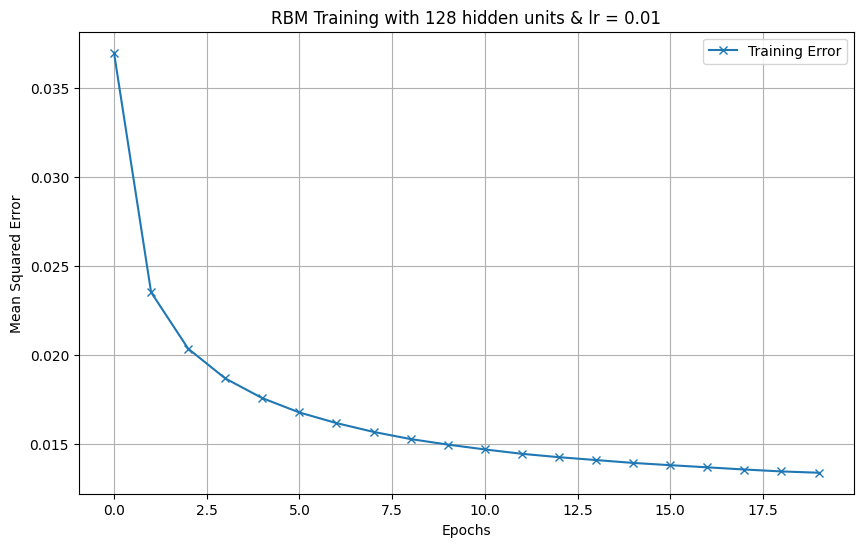

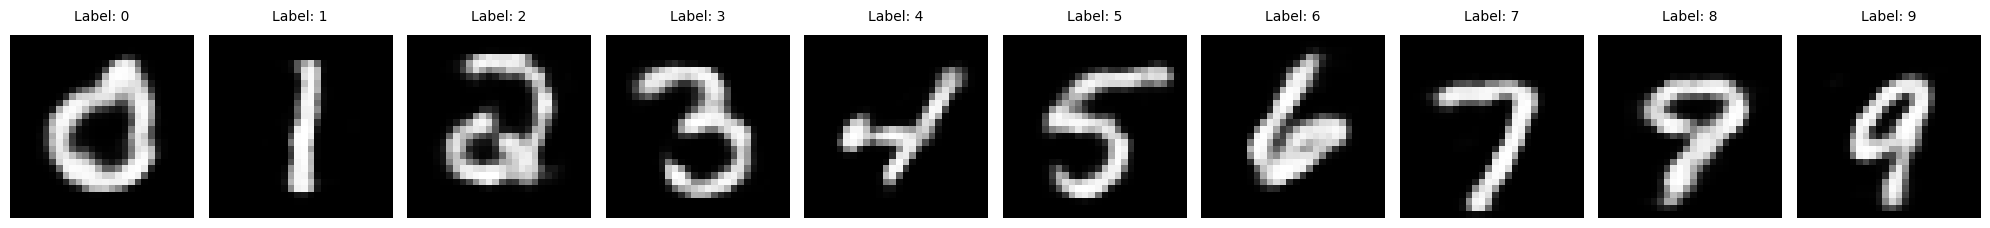

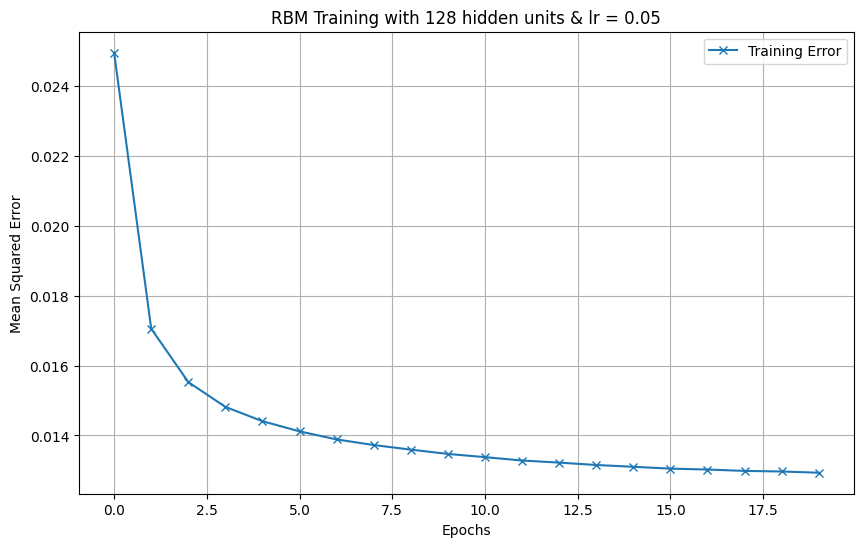

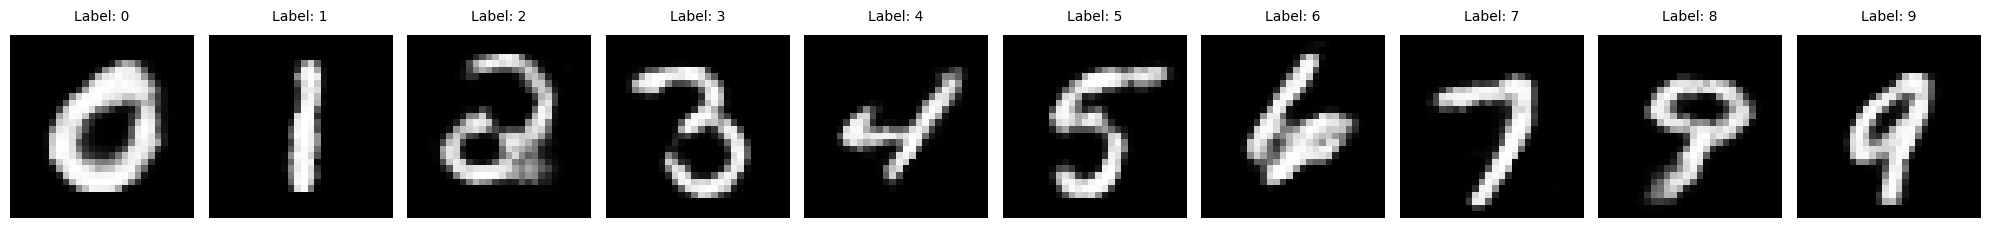

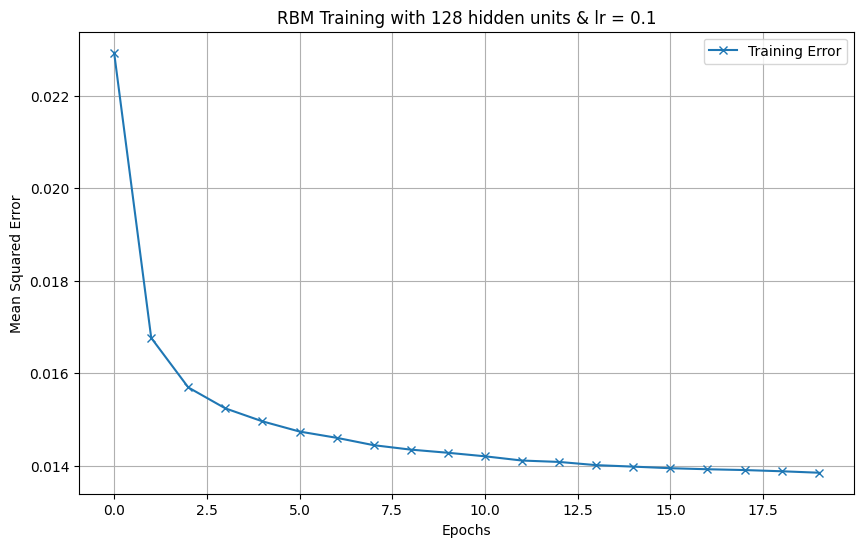

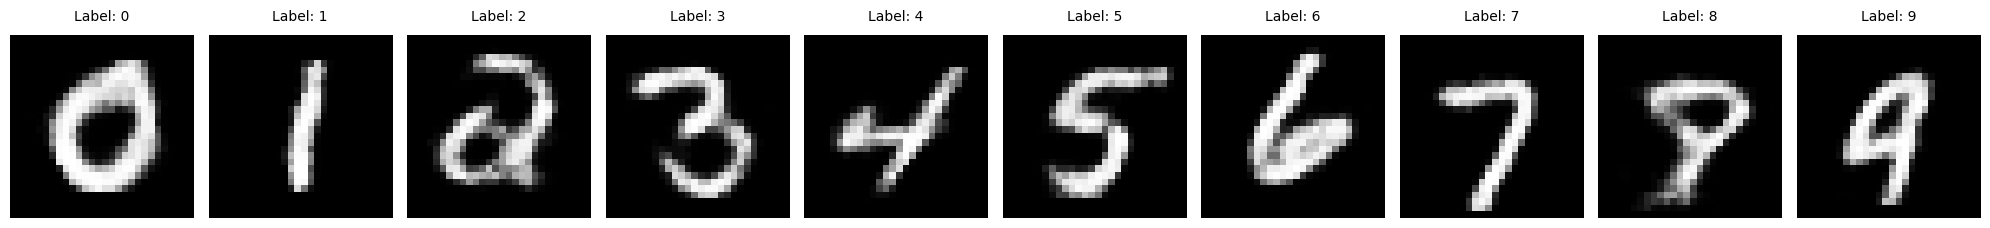

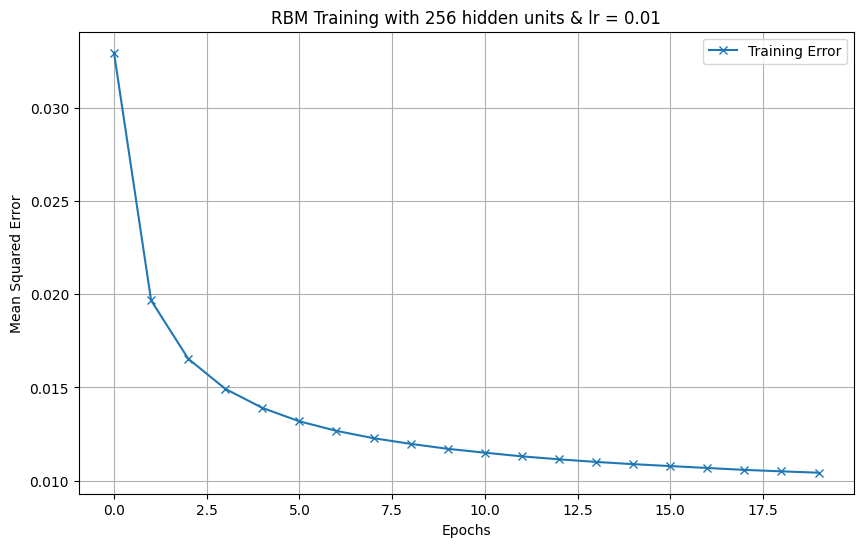

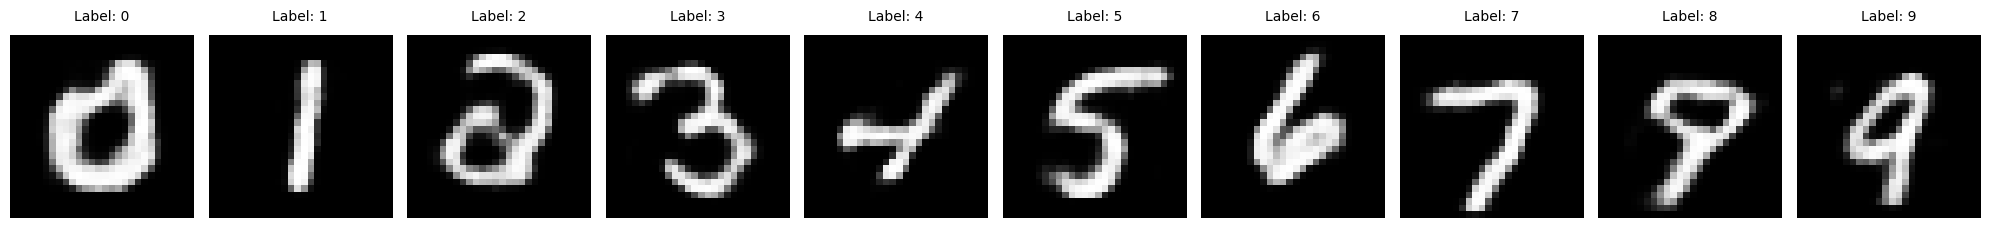

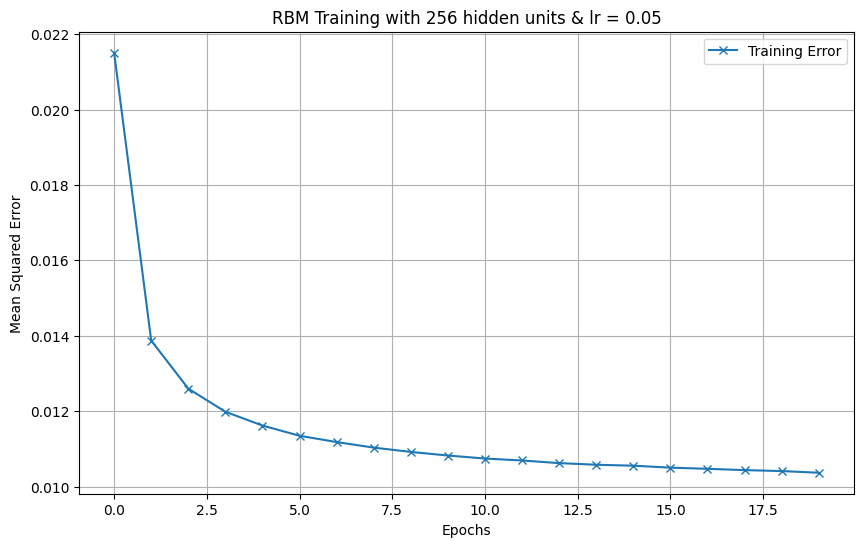

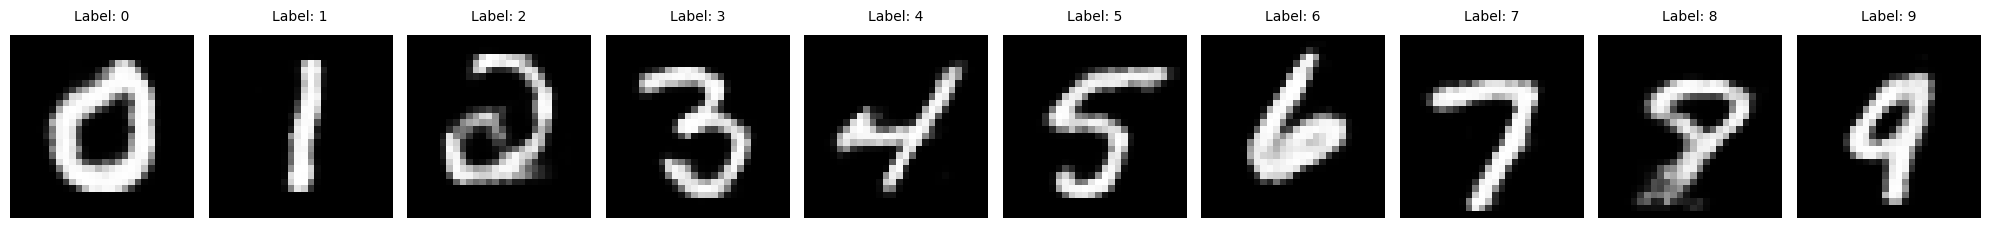

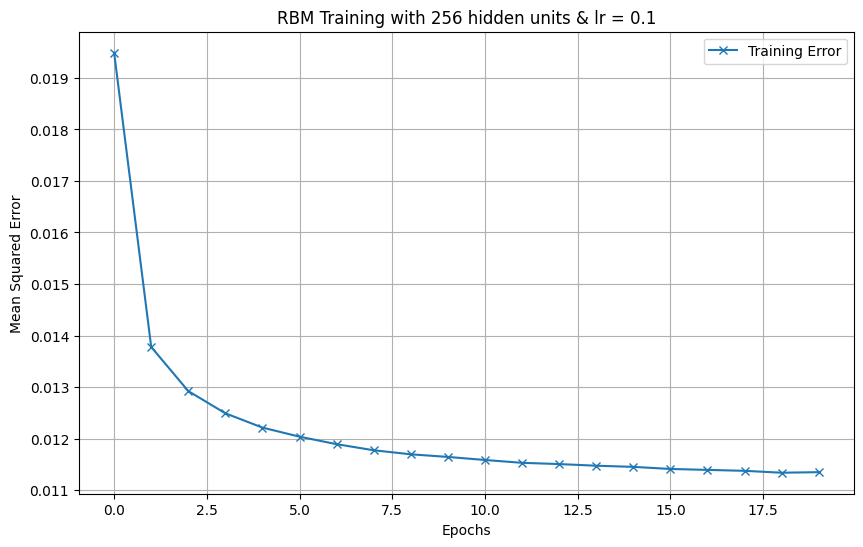

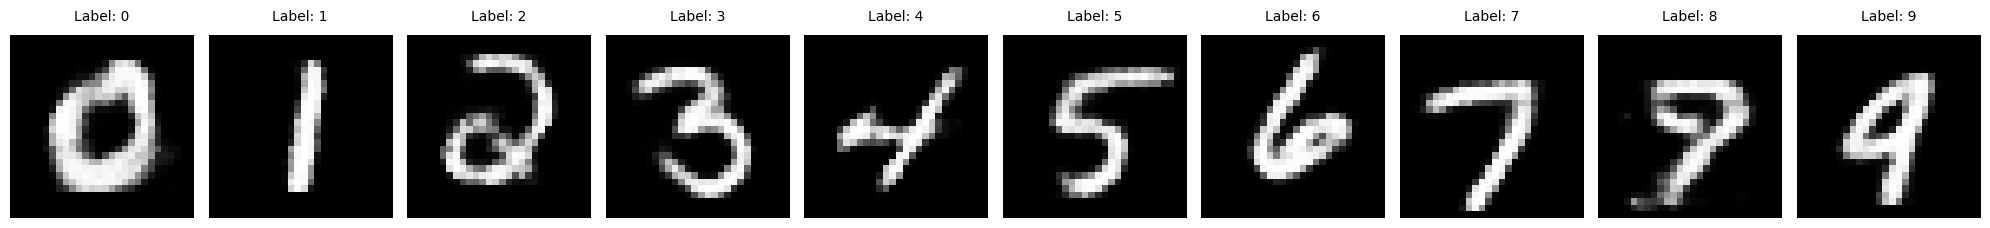

In [83]:
n_hidden = [64, 128, 256]
learning_rates = [0.01, 0.05, 0.1]
for nh in n_hidden:
    for lr in learning_rates:
        reconstructions = plot_errors_rbm(X_train, X_test_sample, n_hidden=nh, learning_rate=lr, batch_size=10, max_epochs=20, title=f"RBM Training with {nh} hidden units & lr = {lr}")
        plot_images(reconstructions, Y_test_sample)

<div style="text-align: left;">
  <h4><b>Ejercicio 6</b></h4>
</div>

**Entrene una red convolucional para clasificar las imágenes de la base de datos MNIST. ¿Cuál es la red convolucional más pequeña que puede conseguir con una exactitud de al menos $90\%$ en el conjunto de evaluación? ¿Cuál es el perceptrón multicapa más pequeño que puede conseguir con la misma exactitud?**

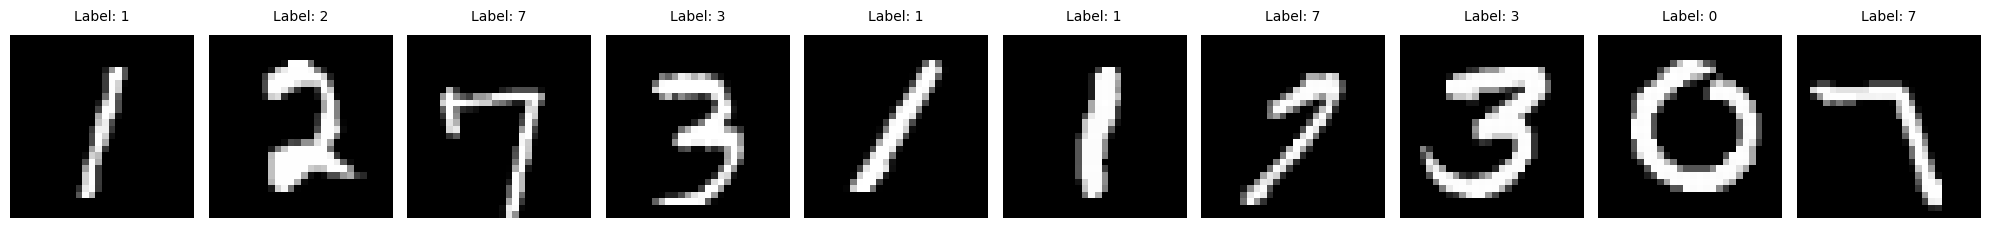

In [84]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Loaders to iterate over the datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 10 random images from the training set to verify the data loading
indices = np.random.choice(len(train_dataset), size=10, replace=False)
plot_images(train_dataset.data[indices], train_dataset.targets[indices])

display(HTML(f"<b>Training shapes:</b> {train_dataset.data.shape}"))
display(HTML(f"<b>Test shapes:</b> {test_dataset.data.shape}"))

In [85]:

# Accuracy: 86.47%
class TinyCNN882(nn.Module):
    # 882 params
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 8, 5, stride=2, padding=2)
        self.c2 = nn.Conv2d(8, 8, 3, padding=1)
        self.fc = nn.Linear(8, 10)
    def forward(self, x):
        x = F.relu(self.c1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.c2(x))
        x = x.mean(dim=(2,3))
        return self.fc(x)

# Accuracy: 90%
class CNN946(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 6, 5, stride=2, padding=2, bias=True)   # 156
        self.c2 = nn.Conv2d(6, 12, 3, padding=1, bias=True)            # 660
        self.fc = nn.Linear(12, 10, bias=True)                         # 130
    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,6,14,14)
        x = F.max_pool2d(x, 2)         # (B,6,7,7)
        x = F.relu(self.c2(x))         # (B,12,7,7)
        x = x.mean(dim=(2,3))          # GAP -> (B,12)
        return self.fc(x)              # (B,10)
    


In [86]:
class CNN760(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 5, 5, stride=2, padding=2, bias=True)  # 1*5*5*5 + 5 = 130
        self.c2 = nn.Conv2d(5, 10, 3, padding=1, bias=True)           # 10*5*3*3 + 10 = 460
        self.fc = nn.Linear(10, 10, bias=True)                        # 10*10 + 10 = 110
                                                                      # TOTAL = 760
    def forward(self, x):
        x = F.relu(self.c1(x))      # (B,5,14,14)
        x = F.max_pool2d(x, 2)      # (B,5,7,7)
        x = F.relu(self.c2(x))      # (B,10,7,7)
        x = x.mean(dim=(2,3))       # GAP -> (B,10)
        return self.fc(x)

class CNN588(nn.Module):
    # c1: 130, c2: 368, fc: 90 → total = 588
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 5, 5, stride=2, padding=2, bias=True)   # (B,5,14,14)
        self.c2 = nn.Conv2d(5, 8, 3, padding=1, bias=True)             # (B,8,7,7)
        self.fc = nn.Linear(8, 10, bias=True)

    def forward(self, x):
        x = F.relu(self.c1(x))       # (B,5,14,14)
        x = F.max_pool2d(x, 2)       # (B,5,7,7)
        x = F.relu(self.c2(x))       # (B,8,7,7)
        x = x.mean(dim=(2, 3))       # (B,8)
        return self.fc(x)            # (B,10)




In [87]:
def count_params(model) -> int:
    """
    Count the number of trainable parameters in a model.
    """
    return sum(param.numel() for param in model.parameters() if param.requires_grad)

def train_model(model, train_loader, optimizer, criterion, device) -> float:
    """
    Train the given model using the provided data loader, optimizer, and loss criterion.
    """
    model.train()
    
    loss_batch = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        
        outputs = model(X)              # Forward pass
        loss = criterion(outputs, y)    # Compute loss
        loss.backward()                 # Backward pass
        optimizer.step()                # Update weights

        loss_batch += loss.item()

    return loss_batch / len(train_loader)

def test_model(model, test_loader, device) -> float:
    """
    Test the given model using the provided test data loader, returning the accuracy.
    """
    model.eval()
    
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            
            outputs = model(X)
            preds = torch.argmax(outputs, dim=1) # Predicted class
            
            correct += (preds == y).sum().item()
            total += y.size(0)
    
    return 100 * correct / total

def train_and_test_model(model, train_loader, test_loader, epochs=15, lr=1e-3) -> None:
    """
    Train & test the given model using the provided data loaders.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr) # Better than SGD
    criterion = nn.CrossEntropyLoss()
    
    epoch = 0
    while epoch < epochs:
        train_loss = train_model(model, train_loader, optimizer, criterion, device)
        accuracy = test_model(model, test_loader, device)
        
        epoch += 1
        display(HTML(f"<b>Epoch {epoch}/{epochs} -> </b> Loss: {train_loss:.2f} || Accuracy: {accuracy:.2f}%"))

In [88]:
models = {
    "CNN946": CNN946(),
    "TinyCNN882": TinyCNN882(),
    "CNN760": CNN760(),
    "CNN588": CNN588()
}
    
for name, model in models.items():
    display(HTML(f"<h3>Training model: {name} with {count_params(model)} trainable parameters</h3>"))
    train_and_test_model(model, train_loader, test_loader, epochs=15, lr=1e-3)
    

In [89]:
class DWConv424(nn.Module):
    # ~424 parámetros
    def __init__(self):
        super().__init__()
        # 1 -> 6 canales, stride 2
        self.c1 = nn.Conv2d(1, 6, 5, stride=2, padding=2, bias=True)   # 156
        # depthwise: 6 grupos, cada canal con su propio filtro 3x3
        self.dw = nn.Conv2d(6, 6, 3, padding=1, groups=6, bias=False)  # 54
        # pointwise: mezcla canales 6 -> 12
        self.pw = nn.Conv2d(6, 12, 1, bias=True)                       # 84
        # clasificador
        self.fc = nn.Linear(12, 10, bias=True)                         # 130

    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,6,14,14)
        x = F.max_pool2d(x, 2)         # (B,6,7,7)
        x = self.dw(x)                 # (B,6,7,7)
        x = F.relu(self.pw(x))         # (B,12,7,7)
        x = x.mean(dim=(2,3))          # (B,12)
        return self.fc(x)              # (B,10)

class AllConv280(nn.Module):
    # ~280 parámetros
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 6, 5, stride=2, padding=2, bias=True)   # 156
        self.dw = nn.Conv2d(6, 6, 3, padding=1, groups=6, bias=False)  # 54
        # 6 -> 10 clases directamente
        self.pw = nn.Conv2d(6, 10, 1, bias=True)                       # 70

    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,6,14,14)
        x = F.max_pool2d(x, 2)         # (B,6,7,7)
        x = self.dw(x)                 # (B,6,7,7)
        x = self.pw(x)                 # (B,10,7,7)
        x = x.mean(dim=(2,3))          # (B,10)
        return x                        # logits

class CNN3Conv856(nn.Module):
    # ~856 parámetros
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 4, 5, stride=2, padding=2, bias=True)   # 104
        self.c2 = nn.Conv2d(4, 6, 3, padding=1, bias=True)             # 222
        self.c3 = nn.Conv2d(6, 8, 3, padding=1, bias=True)             # 440
        self.fc = nn.Linear(8, 10, bias=True)                          # 90

    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,4,14,14)
        x = F.max_pool2d(x, 2)         # (B,4,7,7)
        x = F.relu(self.c2(x))         # (B,6,7,7)
        x = F.relu(self.c3(x))         # (B,8,7,7)
        x = x.mean(dim=(2,3))          # (B,8)
        return self.fc(x)              # (B,10)

class CNNBottleneck758(nn.Module):
    # ~758 parámetros
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 6, 5, stride=2, padding=2, bias=True)   # 156
        self.b1 = nn.Conv2d(6, 4, 1, bias=True)                        # 28
        self.c2 = nn.Conv2d(4, 12, 3, padding=1, bias=True)            # 444
        self.fc = nn.Linear(12, 10, bias=True)                         # 130

    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,6,14,14)
        x = F.max_pool2d(x, 2)         # (B,6,7,7)
        x = F.relu(self.b1(x))         # (B,4,7,7)
        x = F.relu(self.c2(x))         # (B,12,7,7)
        x = x.mean(dim=(2,3))          # (B,12)
        return self.fc(x)              # (B,10)

class SingleConv442(nn.Module):
    # ~442 parámetros
    def __init__(self):
        super().__init__()
        self.c1 = nn.Conv2d(1, 12, 5, stride=2, padding=2, bias=True)  # 312
        self.fc = nn.Linear(12, 10, bias=True)                         # 130

    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,12,14,14)
        x = F.max_pool2d(x, 2)         # (B,12,7,7)
        x = x.mean(dim=(2,3))          # (B,12)
        return self.fc(x)              # (B,10)


In [90]:
models = {
    "CNN946": CNN946(),
    "DWConv424": DWConv424(),
    "CNN3Conv856": CNN3Conv856(),
    "CNNBottleneck758": CNNBottleneck758()
}

for name, model in models.items():
    display(HTML(f"<h3>Training model: {name} with {count_params(model)} trainable parameters</h3>"))
    train_and_test_model(model, train_loader, test_loader, epochs=15, lr=1e-3)

In [91]:
class DWConv540(nn.Module):
    # ~540 parámetros
    def __init__(self):
        super().__init__()
        # 1 -> 8 canales (más discriminativo, +32 params aprox)
        self.c1 = nn.Conv2d(1, 8, 5, stride=2, padding=2, bias=True)   # 1*8*5*5 + 8 = 208
        
        # depthwise: 8 grupos → muy barato (+36 params aprox)
        self.dw = nn.Conv2d(8, 8, 3, padding=1, groups=8, bias=False)  # 8 * 3 * 3 = 72
        
        # pointwise: 8 -> 14 (+28 params aprox)
        self.pw = nn.Conv2d(8, 14, 1, bias=True)                       # 8*14 + 14 = 126
        
        # capa final: 14 -> 10 (+20 params aprox)
        self.fc = nn.Linear(14, 10, bias=True)                         # 14*10 + 10 = 150

    def forward(self, x):
        x = F.relu(self.c1(x))         # (B,8,14,14)
        x = F.max_pool2d(x, 2)         # (B,8,7,7)
        x = self.dw(x)                 # (B,8,7,7)
        x = F.relu(self.pw(x))         # (B,14,7,7)
        x = x.mean(dim=(2,3))          # (B,14)
        return self.fc(x)

train_and_test_model(DWConv540(), train_loader, test_loader, epochs=15, lr=1e-3)

In [92]:
class MLP(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=16, num_classes=10):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        """
        Forward pass of the MLP.
        """
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
hidden_dims = [2, 4, 6]
for dim in hidden_dims:
    display(HTML(f"<h3>Training MLP with {dim} hidden dimensions</h3>"))
    display(HTML(f"<b>Trainable parameters: {count_params(MLP(hidden_dim=dim))}</b>"))
    train_and_test_model(MLP(hidden_dim=dim), train_loader, test_loader, epochs=15, lr=1e-3)

<div style="text-align: left;">
  <h4><b>Ejercicio 7</b></h4>
</div>

**Entrene un autoencoder para obtener una representación de baja dimensionalidad de las imágenes de MNIST. Use dichas representaciones para entrenar un perceptrón multicapa como clasificador. ¿Cuál es el tiempo de entrenamiento y la exactitud del clasificador obtenido cuando parte de la representación del autoencoder, en comparación con lo obtenido usando las imágenes originales?**

In [93]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):
        super().__init__()

        self.flatten = nn.Flatten()
        self.latent_dim = latent_dim

        # Encoder
        self.enc_fc1 = nn.Linear(784, 256)
        self.enc_fc2 = nn.Linear(256, 128)
        self.enc_fc3 = nn.Linear(128, 64)
        self.enc_fc4 = nn.Linear(64, self.latent_dim)

        # Decoder
        self.dec_fc1 = nn.Linear(self.latent_dim, 64)
        self.dec_fc2 = nn.Linear(64, 128)
        self.dec_fc3 = nn.Linear(128, 256)
        self.dec_fc4 = nn.Linear(256, 784)

    def encode(self, input) -> torch.Tensor:
        """
        Encode the input into the latent space.
        """
        x = self.flatten(input)
        x = F.relu(self.enc_fc1(x))
        x = F.relu(self.enc_fc2(x))
        x = F.relu(self.enc_fc3(x))
        z = self.enc_fc4(x)
        return z

    def decode(self, z) -> torch.Tensor:
        """
        Decode the latent representation back to the input space.
        """
        x = F.relu(self.dec_fc1(z))
        x = F.relu(self.dec_fc2(x))
        x = F.relu(self.dec_fc3(x))
        x_hat = torch.sigmoid(self.dec_fc4(x))
        return x_hat.view(-1, 1, 28, 28)

    def forward(self,input):
        """
        Forward pass through the autoencoder.
        """
        return self.decode(self.encode(input))
    
    def train_model(self, train_loader, optimizer, criterion, device) -> float:
        """
        Train the autoencoder on the given data loader.
        """
        self.train()
        self.to(device)

        loss_batch = 0
        for X, _ in train_loader:
            X = X.to(device)
            optimizer.zero_grad()

            X_hat = self.forward(X)
            loss = criterion(X_hat, X)
            loss.backward()
            optimizer.step()

            loss_batch += loss.item()

        return loss_batch / len(train_loader)

    def test_model(self, test_loader, criterion, device) -> float:
        """
        Test the autoencoder on the given data loader.
        """
        self.eval()

        loss_batch = 0
        with torch.no_grad():
            for X, _ in test_loader:
                X = X.to(device)
                
                X_hat = self.forward(X)
                loss = criterion(X_hat, X)
                loss_batch += loss.item()

        return loss_batch / len(test_loader)

    def train_and_test(self, train_loader, test_loader=None, epochs=10, lr=1e-3) -> None:
        """
        Train & test the autoencoder using the provided data loaders.
        """
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)
        
        optimizer = torch.optim.Adam(self.parameters(), lr=lr)
        criterion = nn.MSELoss()

        epoch = 0
        while epoch < epochs:
            train_loss = self.train_model(train_loader, optimizer, criterion, device)
            epoch += 1
            
            if test_loader:
                test_loss = self.test_model(test_loader, criterion, device)
                display(HTML(f"<b>Epoch {epoch}/{epochs} -> </b> Train Loss: {train_loss:.4f} || Test Loss: {test_loss:.4f}"))

            else:
                display(HTML(f"<b>Epoch {epoch}/{epochs} -> </b> Loss: {train_loss:.4f}"))
            

    def latent_dataset(self, data_loader) -> torch.utils.data.TensorDataset:
        """
        Generate a dataset of latent representations from the input data loader.
        """
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)
        self.eval()
        
        z = []
        latent_y = []
        with torch.no_grad():
            for X, y in data_loader:
                X, y = X.to(device), y.to(device)

                z.append(self.encode(X))
                latent_y.append(y)

        z = torch.cat(z, dim=0)
        latent_y = torch.cat(latent_y, dim=0)

        return torch.utils.data.TensorDataset(z, latent_y)


In [94]:
latent_dims = [16, 32, 64]

for dim in latent_dims:
    display(HTML(f"<h2>Training Autoencoder with latent dimension: {dim}</h2>"))
    AE = Autoencoder(latent_dim=dim)
    AE.train_and_test(train_loader, test_loader, epochs=5, lr=1e-3)

    # Latent datasets
    latent_train_dataset = AE.latent_dataset(train_loader)
    latent_test_dataset = AE.latent_dataset(test_loader)

    # Latent data loaders
    latent_train_loader = DataLoader(latent_train_dataset, batch_size=64, shuffle=True)
    latent_test_loader  = DataLoader(latent_test_dataset, batch_size=64, shuffle=False)

    # MLP on latent space
    display(HTML(f"<h3>Training MLP on Latent Space with 6 hidden dimensions</h3>"))
    display(HTML(f"<b>Trainable parameters: {count_params(MLP(input_dim=AE.latent_dim, hidden_dim=6))}</b>"))
    train_and_test_model(MLP(input_dim=AE.latent_dim, hidden_dim=6), latent_train_loader, latent_test_loader, epochs=15, lr=1e-3)

<div style="text-align: left;">
  <h4><b>Ejercicio 8</b></h4>
</div>

**Encontrar un perceptrón multicapa que resuelva una XOR de 2 entradas mediante *simulated annealing*. Graficar el error a lo largo del proceso de aprendizaje.**

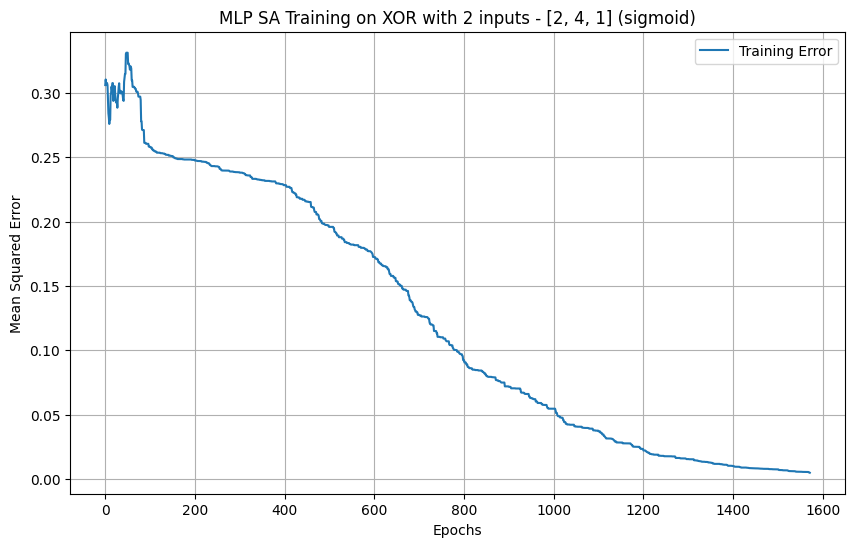

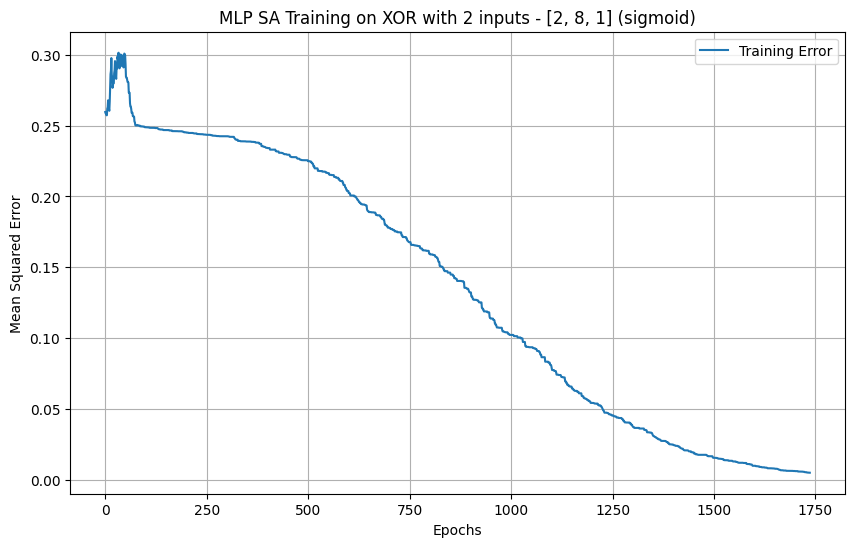

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22588\58152692.py:136: RuntimeWarning: overflow encountered in scalar divide
  if delta_error <= 0 or np.random.rand() < np.exp(-delta_error / T):


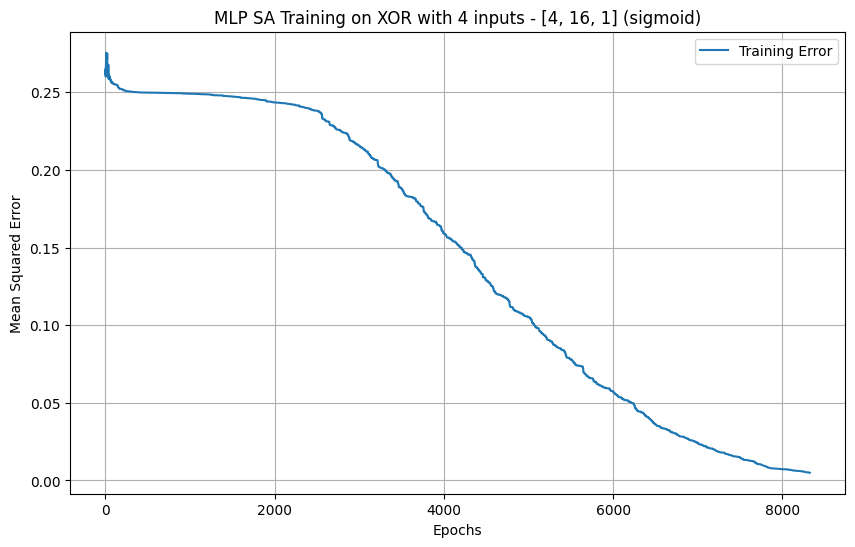

In [95]:
MLP_SA_sigmoid = MultiLayerPerceptron(layers_config=[2, 4, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP_SA_sigmoid, X2, YXor2, learning_rate=0.3, max_epochs=10000, title="MLP SA Training on XOR with 2 inputs - [2, 4, 1] (sigmoid)", sa=True)

MLP_SA_sigmoid = MultiLayerPerceptron(layers_config=[2, 8, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP_SA_sigmoid, X2, YXor2, learning_rate=0.3, max_epochs=10000, title="MLP SA Training on XOR with 2 inputs - [2, 8, 1] (sigmoid)", sa=True)

MLP_SA_sigmoid = MultiLayerPerceptron(layers_config=[4, 16, 1], act_hidden=sigmoid, der_act_hidden=der_sigmoid, act_output=sigmoid, der_act_output=der_sigmoid)
plot_errors_mlp(MLP_SA_sigmoid, X4, YXor4, learning_rate=0.3, max_epochs=500000, title="MLP SA Training on XOR with 4 inputs - [4, 16, 1] (sigmoid)", sa=True)

---
---

<div style="text-align: left;">
  <h3><b>Conclusiones</b></h3>
</div>